# 0.0. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from matplotlib import gridspec

# 0.2. Loading Data

In [2]:
df_cab_data_raw = pd.read_csv('C:/Users/Igor/repos/data_glacier/project_2/G2M_Cab_DataSets/Taxi-Cab-Data-Analysis-and-Insights/datasets/Cab_Data.csv', low_memory=False) 
df_city_raw = pd.read_csv('C:/Users/Igor/repos/data_glacier/project_2/G2M_Cab_DataSets/Taxi-Cab-Data-Analysis-and-Insights/datasets/City.csv', low_memory=False)
df_customer_id_raw = pd.read_csv('C:/Users/Igor/repos/data_glacier/project_2/G2M_Cab_DataSets/Taxi-Cab-Data-Analysis-and-Insights/datasets/Customer_ID.csv', low_memory=False)
df_states_raw = pd.read_csv('C:/Users/Igor/repos/data_glacier/project_2/G2M_Cab_DataSets/Taxi-Cab-Data-Analysis-and-Insights/datasets/states.csv', low_memory=False)
df_transaction_id_raw = pd.read_csv('C:/Users/Igor/repos/data_glacier/project_2/G2M_Cab_DataSets/Taxi-Cab-Data-Analysis-and-Insights/datasets/Transaction_ID.csv', low_memory=False)
df_us_holidays_raw = pd.read_csv('C:/Users/Igor/repos/data_glacier/project_2/G2M_Cab_DataSets/Taxi-Cab-Data-Analysis-and-Insights/datasets/us-federal-holidays-2011-2020.csv', low_memory=False)

# merge datasets
df_raw = pd.merge(df_cab_data_raw, df_transaction_id_raw, how='left', on='Transaction ID')
df_raw_1 = pd.merge(df_raw, df_customer_id_raw, how='left', on='Customer ID')

# Renaming column Date of Travel
df_raw_1.rename(columns={'Date of Travel':'Date'}, inplace=True)

df_raw_2 = pd.merge(df_raw_1, df_us_holidays_raw, how='left', on='Date')
df_raw_2

,Transaction ID,Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,NaN
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,NaN
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,NaN
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,NaN
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,1/8/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,NaN
359388,10440104,1/4/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,NaN
359389,10440105,1/5/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,NaN
359390,10440106,1/5/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,NaN


# 1.0. STEP 01 - DATA DESCRIPTION

In [3]:
df1 = df_raw_2.copy()

## 1.1. Rename Columns

In [4]:
df1.columns

Index(['Transaction ID', 'Date', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Holiday'],
      dtype='object')

In [5]:
df1.columns = ['transaction_id', 'date', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'customer_id', 'payment_mode',
       'gender', 'age', 'income_USD_month', 'holiday']

In [6]:
df1.columns

Index(['transaction_id', 'date', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'customer_id', 'payment_mode',
       'gender', 'age', 'income_USD_month', 'holiday'],
      dtype='object')

In [7]:
df1

,transaction_id,date,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_USD_month,holiday
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,NaN
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,NaN
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,NaN
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,NaN
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,1/8/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,NaN
359388,10440104,1/4/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,NaN
359389,10440105,1/5/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,NaN
359390,10440106,1/5/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,NaN


## 1.2. Data Dimensions

In [8]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 359392
Number of Columns: 13


## 1.3. Data Types

In [9]:
df1['date'] = pd.to_datetime(df1['date']) 
df1.dtypes 

transaction_id               int64
date                datetime64[ns]
company                     object
city                        object
km_travelled               float64
price_charged              float64
cost_of_trip               float64
customer_id                  int64
payment_mode                object
gender                      object
age                          int64
income_USD_month             int64
holiday                     object
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum() 

transaction_id           0
date                     0
company                  0
city                     0
km_travelled             0
price_charged            0
cost_of_trip             0
customer_id              0
payment_mode             0
gender                   0
age                      0
income_USD_month         0
holiday             352328
dtype: int64

## 1.5. Fillout NA using business logic

In [11]:
# holiday
# Replacing all NaN values for 'Regular day'
df1['holiday'] = df1['holiday'].replace(np.nan, 'Regular day', regex=True)

In [12]:
df1.isna().sum()

transaction_id      0
date                0
company             0
city                0
km_travelled        0
price_charged       0
cost_of_trip        0
customer_id         0
payment_mode        0
gender              0
age                 0
income_USD_month    0
holiday             0
dtype: int64

## 1.6. Descriptive Statistical

### 1.6.1 Numerical Atributes

In [13]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [14]:
#central tendency - mean, median
ct1 = pd.DataFrame (num_attributes.apply(np.mean)).T 
ct2 = pd.DataFrame (num_attributes.apply(np.median)).T

#dispersion - std, min ,max, range, skew, kurtosis
d1 = pd.DataFrame (num_attributes.apply(np.std)).T
d2 = pd.DataFrame (num_attributes.apply(min)).T
d3 = pd.DataFrame (num_attributes.apply(max)).T
d4 = pd.DataFrame (num_attributes.apply(lambda x: x.max() - x.min())).T # range
d5 = pd.DataFrame (num_attributes.apply(lambda x: x.skew())).T # skew
d6 = pd.DataFrame (num_attributes.apply(lambda x: x.kurtosis())).T # kurtosis

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [15]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,transaction_id,10000011.00,10440107.00,440096.00,10220761.19,10221035.50,126805.63,0.00,-1.20
1,km_travelled,1.90,48.00,46.10,22.57,22.44,12.23,0.06,-1.13
2,price_charged,15.60,2048.03,2032.43,423.44,386.36,274.38,0.87,0.75
3,cost_of_trip,19.00,691.20,672.20,286.19,282.48,157.99,0.14,-1.01
4,customer_id,1.00,60000.00,59999.00,19191.65,7459.00,21012.38,0.88,-0.89
5,age,18.00,65.00,47.00,35.34,33.00,12.59,0.69,-0.46
6,income_USD_month,2000.00,35000.00,33000.00,15048.82,14685.00,7969.40,0.31,-0.66


### 1.7.2 Categorical Atributes

In [16]:
# For categorical variables it is used boxplot, which shows all central and dispersion meassures in one place.
# Also show outiers.
cat_attributes.apply(lambda x: x.unique().shape[0])

company          2
city            19
payment_mode     2
gender           2
holiday         11
dtype: int64

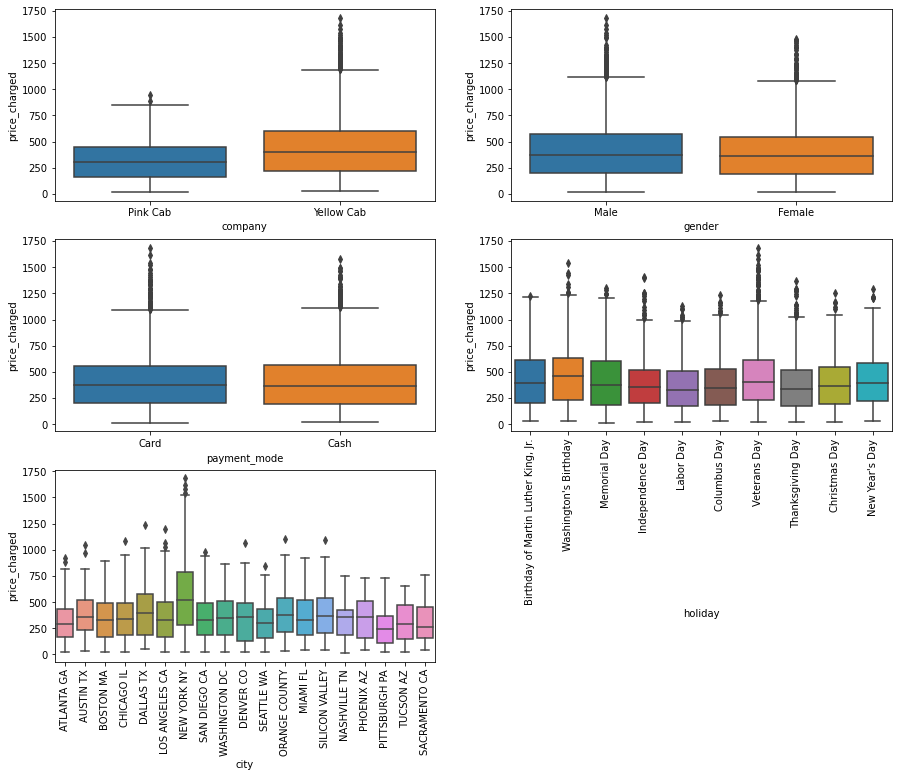

In [17]:
aux1 = df1[(df1['holiday'] != 'Regular day') & (df1['price_charged'] > 0)]

fig = plt.figure(figsize=(15,12)) 

fig.add_subplot(3,2,1)
sns.boxplot(x = 'company', y = 'price_charged', data = aux1)

fig.add_subplot(3,2,2)
sns.boxplot(x = 'gender', y = 'price_charged', data = aux1)

fig.add_subplot(3,2,3)
sns.boxplot(x = 'payment_mode', y = 'price_charged', data = aux1)

fig.add_subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'price_charged', data = aux1)
plt.xticks(rotation=90);

fig.add_subplot(3,2,5)
sns.boxplot(x = 'city', y = 'price_charged', data = aux1)
plt.xticks(rotation=90);

# 2.0. STEP 02 - FEATURE ENGINEERING

In [18]:
df2 = df1.copy()

In [19]:
df2 = df1.copy()
#creating profit variable
df2['profit'] = (df2['price_charged'] - df2['cost_of_trip']).apply(lambda x : x)


# separating varialbe date

# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

#year month
df2['year_month'] = df2['date'].dt.strftime('%Y-%m')

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

#month_day
df2['month_day'] = pd.to_datetime(df2['date']).dt.strftime('%m-%d')

# #creating variables season
df2['season'] = df2.apply(lambda x: 'spring' if (x['month_day'] >='03-01') & (x['month_day'] <='05-31') else
                                    'summer' if (x['month_day'] >='06-01') & (x['month_day'] <='08-31') else 
                                    'fall'   if (x['month_day'] >='09-01') & (x['month_day'] <='11-30') else
                                    'winter', axis = 1)

# Followign the Business Assumptions from README, it will be added the state code for the cities SILICON VALLEY and ORANGE COUNTY,
# that is CAlofornia CA for both
df2['city'] = df2['city'].apply(lambda x: 'SILICON VALLEY CA' if x == 'SILICON VALLEY' else 
                                                          'ORANGE COUNTY CA' if x == 'ORANGE COUNTY'   else x)

# spilt city in two columns
new = df2['city'].str.rsplit(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
df2["cities"]= new[0]
  
# making separate last name column from new data frame
df2["State Code"]= new[1]
  
# Dropping old Name columns
df2.drop(columns =["city"], inplace = True)

# merge df2 with dataset df_states_raw
df2 = pd.merge(df2, df_states_raw, how='left', on='State Code')

# Renaming column State Code
df2.rename(columns={'State Code':'state_code', 'State':'state', 'Region':'region', 'Division':'division'}, inplace=True)

# drop column State
df2 = df2.drop('state', axis =1)

# 3.0. - Step 03 - Numerical Outliers Detection

In [20]:
df3 = df2.copy()

In [21]:
a = df3.select_dtypes(include=['int64', 'float64'])
a.head()

,transaction_id,km_travelled,price_charged,cost_of_trip,customer_id,age,income_USD_month,profit,year,month,day
0,10000011,30.45,370.95,313.63,29290,28,10813,57.31,2016,1,8
1,10000012,28.62,358.52,334.85,27703,27,9237,23.67,2016,1,6
2,10000013,9.04,125.20,97.63,28712,53,11242,27.57,2016,1,2
3,10000014,33.17,377.40,351.60,28020,23,23327,25.80,2016,1,7
4,10000015,8.73,114.62,97.78,27182,33,8536,16.84,2016,1,3


<AxesSubplot:xlabel='income_USD_month'>

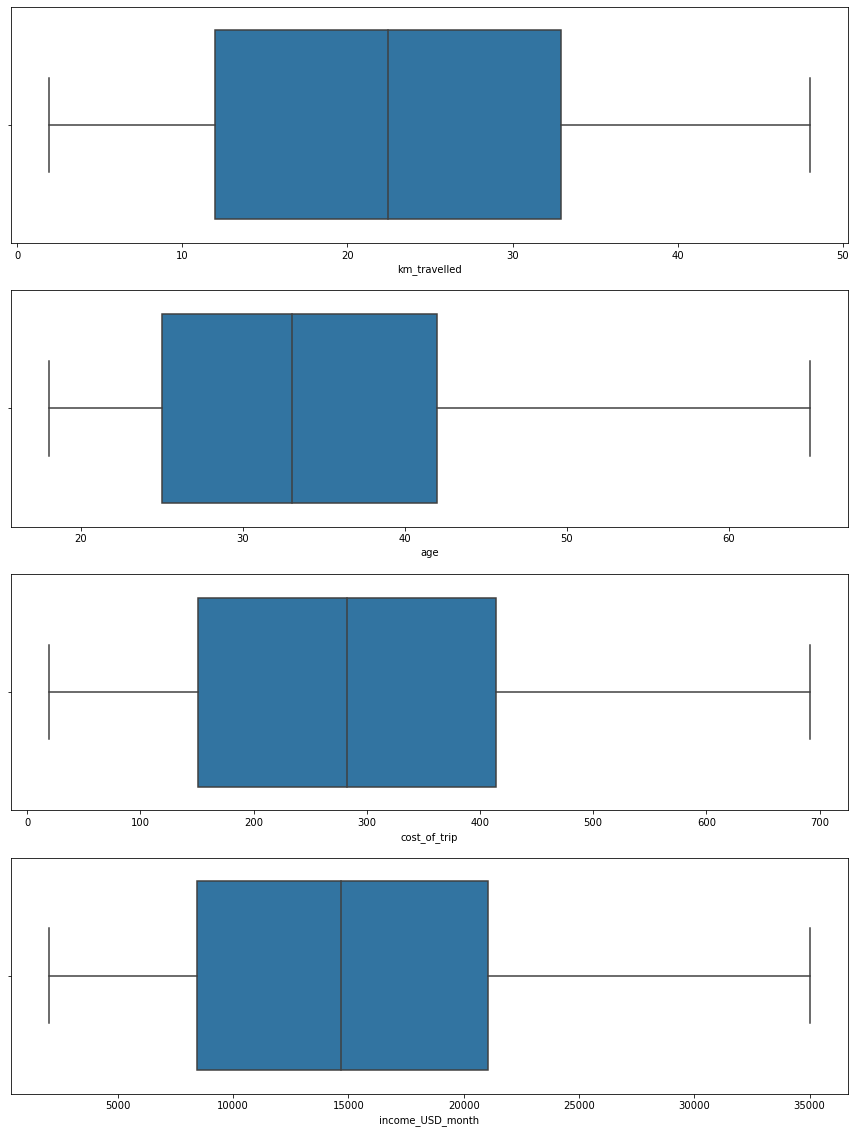

In [22]:
plt.figure(figsize = (15,20))
# km_travelled
plt.subplot(4,1,1)
sns.boxplot(df3['km_travelled'])

# age
plt.subplot(4,1,2)
sns.boxplot(df3['age'])

# # cost_of_trip'
plt.subplot(4,1,3)
sns.boxplot(df3['cost_of_trip'])

# # income_USD_month
plt.subplot(4,1,4)
sns.boxplot(df3['income_USD_month'])

<AxesSubplot:xlabel='day'>

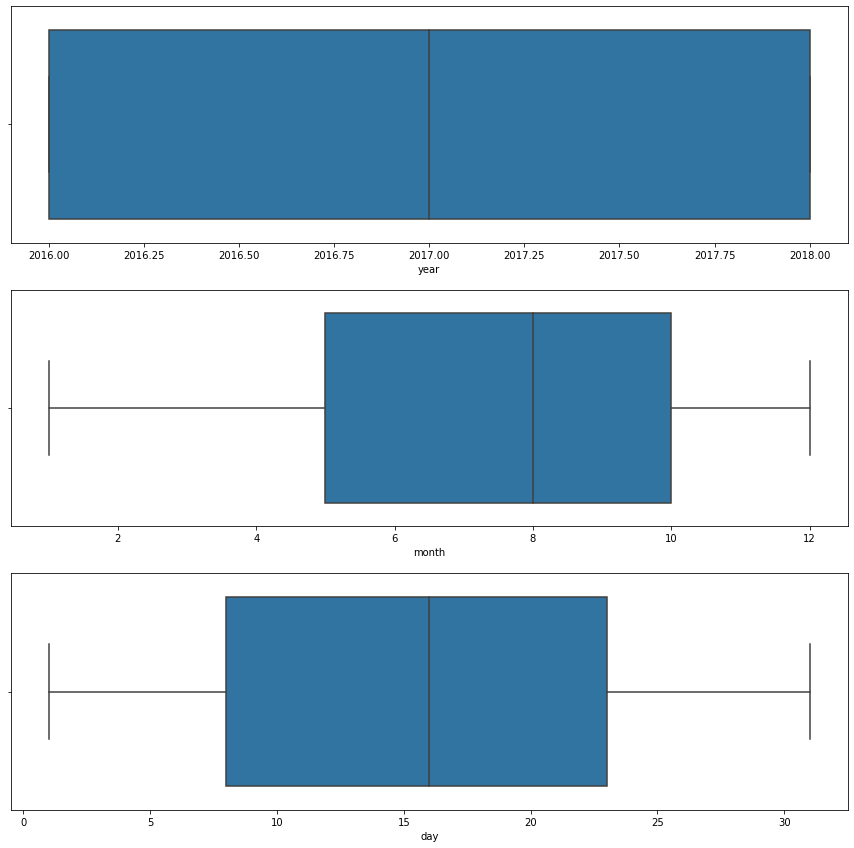

In [23]:
plt.figure(figsize = (15,20))
# year
plt.subplot(4,1,1)
sns.boxplot(df3['year'])

# # month
plt.subplot(4,1,2)
sns.boxplot(df3['month'])

# # day
plt.subplot(4,1,3)
sns.boxplot(df3['day'])

<AxesSubplot:xlabel='profit'>

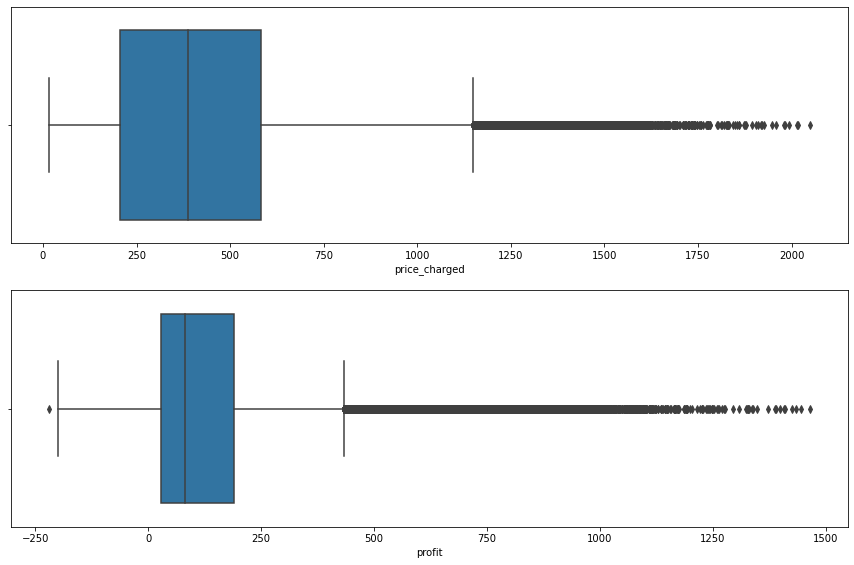

In [24]:
plt.figure(figsize = (15,20))
# price_charged
plt.subplot(4,1,1)
sns.boxplot(df3['price_charged'])

# # profit
plt.subplot(4,1,2)
sns.boxplot(df3['profit'])

In [25]:
#defining quartile or percentile
Q1, Q3 = np.percentile(df3['price_charged'], [25,75])
print('First quartile or percentile 25 is:',Q1)
print('Third quartile or percentile 75 is:',Q3)

amp_interquartile = Q3 - Q1
print(amp_interquartile)

# determinating inferirior and superior limit
inferior_limit = Q1 - (1.5 * amp_interquartile)
superior_limit = Q3 + (1.5 * amp_interquartile)
print('Inferirior limit is:',inferior_limit)
print('Superior limit is:',superior_limit)

First quartile or percentile 25 is: 206.4375
Third quartile or percentile 75 is: 583.66
377.22249999999997
Inferirior limit is: -359.39625
Superior limit is: 1149.49375


In [26]:
#defining quartile or percentile
Q1, Q3 = np.percentile(df3['profit'], [25,75])
print('First quartile or percentile 25 is:',Q1)
print('Third quartile or percentile 75 is:',Q3)

amp_interquartile = Q3 - Q1
print(amp_interquartile)

# determinating inferirior and superior limit
inferior_limit = Q1 - (1.5 * amp_interquartile)
superior_limit = Q3 + (1.5 * amp_interquartile)
print('Inferirior limit is:',inferior_limit)
print('Superior limit is:',superior_limit)

First quartile or percentile 25 is: 28.012
Third quartile or percentile 75 is: 190.02999999999997
162.01799999999997
Inferirior limit is: -215.01499999999996
Superior limit is: 433.0569999999999


<AxesSubplot:xlabel='km_travelled', ylabel='price_charged'>

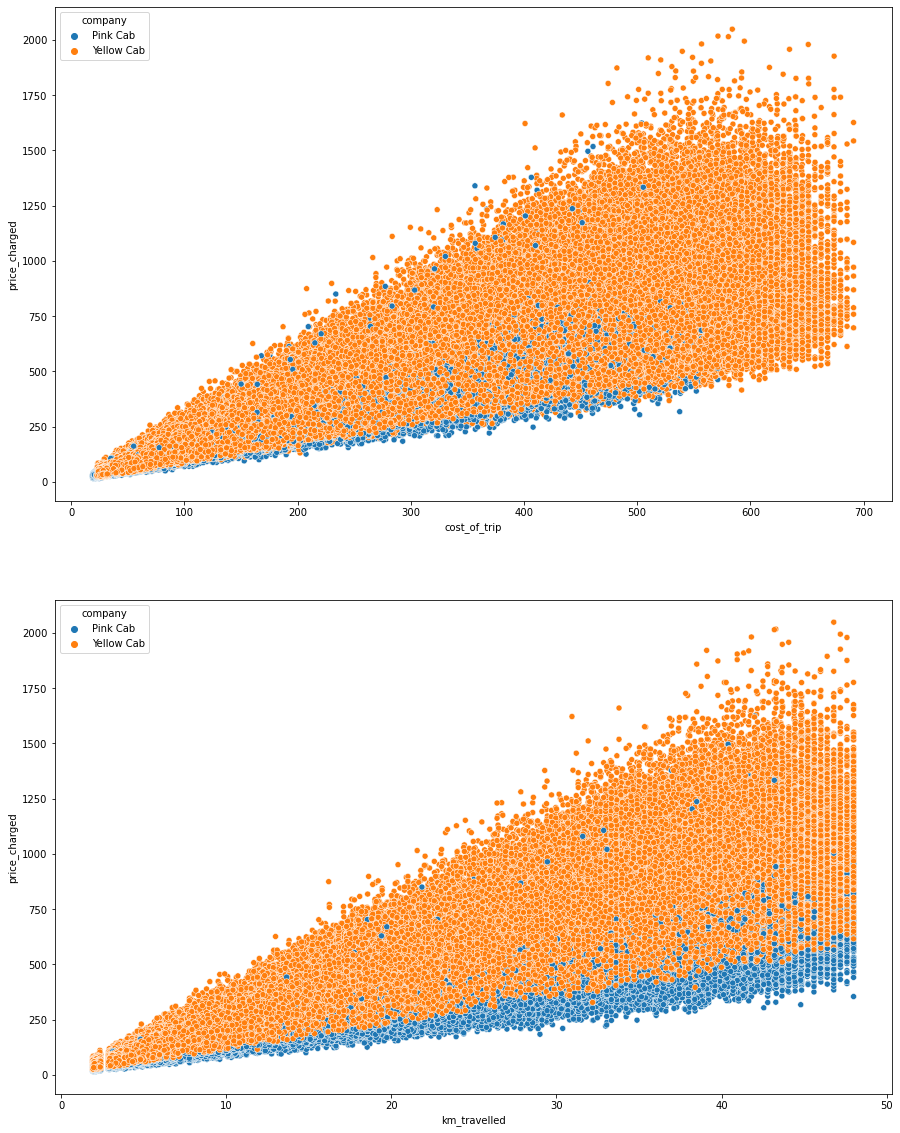

In [27]:
plt.figure(figsize = (15,20))
plt.subplot(2,1,1)
sns.scatterplot(x = 'cost_of_trip', y = 'price_charged', hue = 'company', data = df3)

plt.subplot(2,1,2)
sns.scatterplot(x = 'km_travelled', y = 'price_charged',  hue = 'company', data = df3)

<AxesSubplot:xlabel='km_travelled', ylabel='profit'>

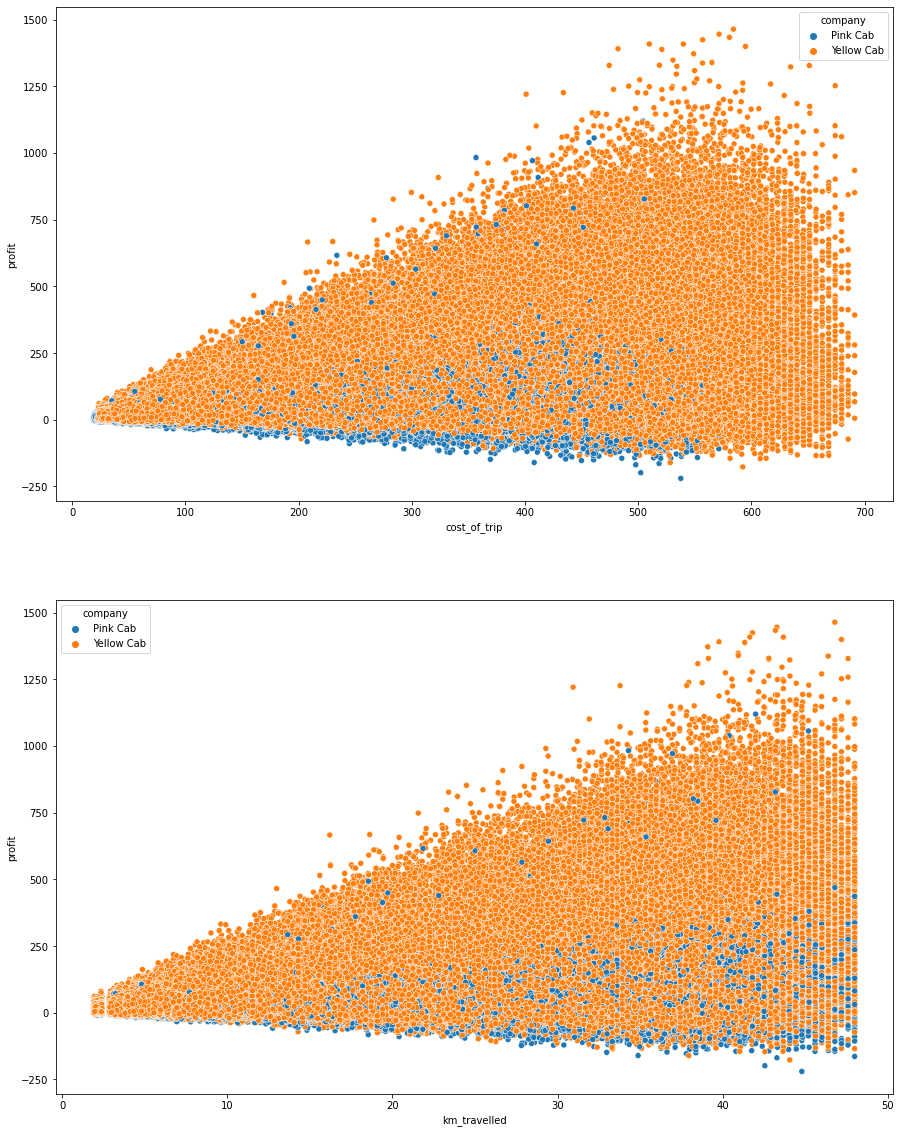

In [28]:
plt.figure(figsize = (15,20))
plt.subplot(2,1,1)
sns.scatterplot(x = 'cost_of_trip', y = 'profit', hue = 'company', data = df3)

plt.subplot(2,1,2)
sns.scatterplot(x = 'km_travelled', y = 'profit',  hue = 'company', data = df3)

Dispite the boxplot shows that there are a lots of outliers from a value of 1149 from the variable price charged and 433 from the variable profit, the others scatterplots shows a pattern of distribution, for both variables, with few outliers from value of arround 1750 (variable price charged) and 1250 (variable profit) just for the Yellow Cab company.

#Also the yellow company shows a number of travel so much higher than the Pink Cab.

For those reasons, it is not necessary exclude any outlier of this dataset.

# 4.0. STEP 04 - EXPLORATORY DATA ANALYSIS (EDA)

In [29]:
df4 = df3.copy()

## 4.1. Univariate Analysis

### 4.1.1. Response Variable

<AxesSubplot:xlabel='profit', ylabel='Count'>

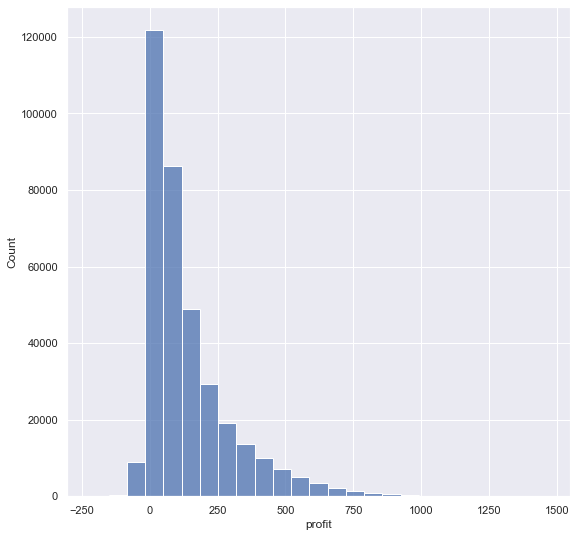

In [56]:
# ploting output variable
sns.set(rc={"figure.figsize": (9, 9)})
sns.histplot(df4['profit'], bins = 25)
# It has some kurtosis and presents a positive skew, which is to the left.

### 4.1.2. Numerical Variable

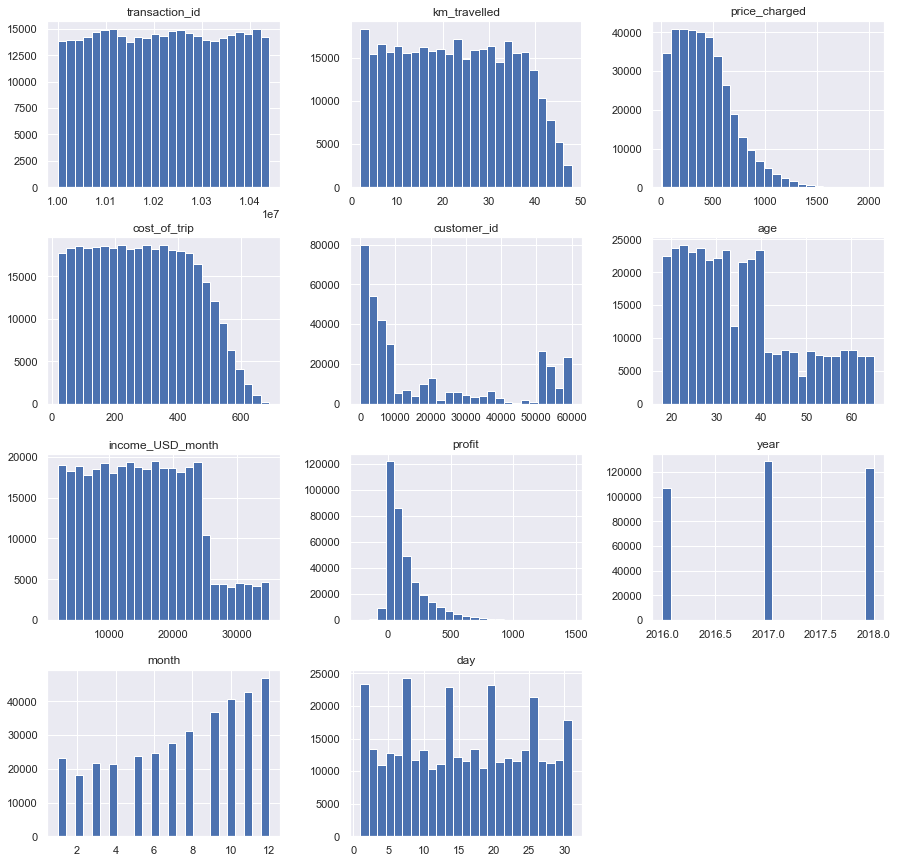

In [31]:
b = df4.select_dtypes(include=['int64', 'float64'])

sns.set(rc={"figure.figsize": (15, 15)})
b.hist(bins = 25);
# Histogram that shows the behavior of all the numerical variables.

### 4.1.3. CAtegorical Variable

In [32]:
c = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])
c.apply(lambda x: x.unique().shape[0])

# The analysis of the categorical variables will serve to answer the business questions and create hypotheses.

company          2
city            19
payment_mode     2
gender           2
holiday         11
dtype: int64

## 4.2. - Business Questions

### 4.2.1. Question 1 - How many travels each company made?

  company_sum  transaction_id_sum  percentage
0    Pink Cab               84711       23.57
1  Yellow Cab              274681       76.43

In total, The company Yellow Cab has 189970 (52.86%) more taxi travels than the company Pink Cab.



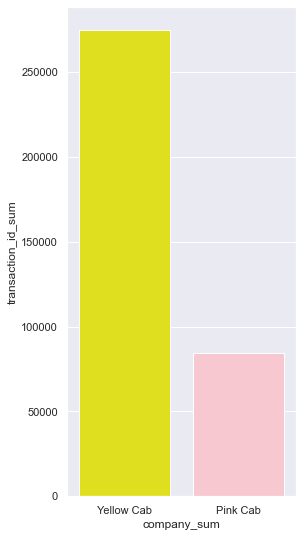

In [57]:
# Total (count)
q1 = df4[['company', 'transaction_id']].groupby('company').count().reset_index()
q1.columns = ['company_sum', 'transaction_id_sum']

for i in range(len(q1)):
    q1.loc[i,'percentage'] = (q1.loc[i, 'transaction_id_sum']) /(sum(q1['transaction_id_sum'])) * 100

q1_difference = q1.iloc[1,1] - q1.iloc[0,1]

q1_percentage = round((q1.loc[1, 'percentage']) - (q1.loc[0, 'percentage']), 2)

print(q1, end='\n\n')
print('In total, The company {} has {} ({}%) more taxi travels than the company {}.'.format(q1.iloc[1,0], q1_difference, q1_percentage, q1.iloc[0,0]), end='\n\n' )

sns.set(rc={"figure.figsize": (9, 9)})
plt.subplot(1,2,1)
sns.barplot(x = 'company_sum', y = 'transaction_id_sum', data = q1.sort_values('transaction_id_sum', ascending = False), palette = ['yellow', 'pink']);

### 4.2.2. Question 2 - What is the total of money made by each company?

  company_sum  profit_sum  percentage
0    Pink Cab  5307328.32       10.76
1  Yellow Cab 44020373.17       89.24

In total, the company Yellow Cab has $38713044.8498 (78.48%) more profit than the company Pink Cab.

  company_average  profit_average
0        Pink Cab           62.65
1      Yellow Cab          160.26

On average, also, the company Yellow Cab has $97.61 (155.79%) more profit than the company Pink Cab.



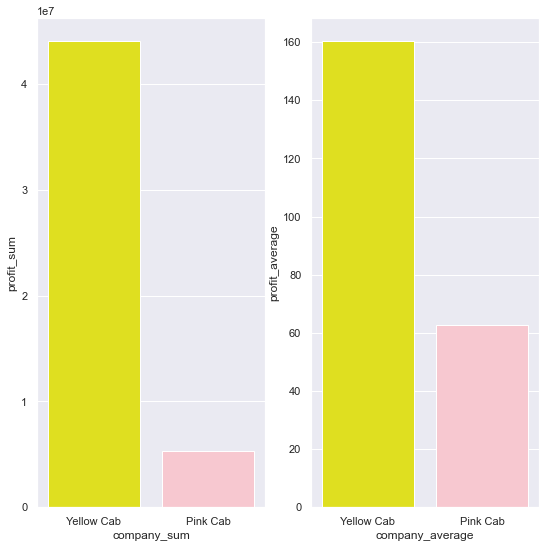

In [58]:
# Total (sum)
q2 = df4[['company', 'profit']].groupby('company').sum().reset_index()
q2.columns = ['company_sum', 'profit_sum']

for i in range(len(q2)):
    q2.loc[i,'percentage'] = (q2.loc[i, 'profit_sum']) /(sum(q2['profit_sum'])) * 100

q2_difference = q2.iloc[1,1] - q2.iloc[0,1]

q2_percentage = round((q2.loc[1, 'percentage']) - (q2.loc[0, 'percentage']), 2)

print(q2, end='\n\n')
print('In total, the company {} has ${} ({}%) more profit than the company {}.'.format(q2.iloc[1,0], q2_difference, q2_percentage, q2.iloc[0,0]), end='\n\n')

sns.set(rc={"figure.figsize": (9, 9)})
plt.subplot(1,2,1)
sns.barplot(x = 'company_sum', y = 'profit_sum', data = q2.sort_values('profit_sum', ascending = False), palette = ['yellow', 'pink']);



# Average (mean)
q1_1 = df4[['company', 'profit']].groupby('company').mean().reset_index()
q1_1.columns = ['company_average', 'profit_average']

q1_1_difference = round(q1_1.iloc[1,1] - q1_1.iloc[0,1], 2)

#(produto maior - produto menor)  / produto menor  * 100
q1_1_percentage = round(((q1_1.loc[1, 'profit_average']) - (q1_1.loc[0, 'profit_average'])) / (q1_1.loc[0, 'profit_average']) *100,2)

print(q1_1, end='\n\n')
print('On average, also, the company {} has ${} ({}%) more profit than the company {}.'.format(q1_1.iloc[1,0], q1_1_difference, q1_1_percentage, q1_1.iloc[0,0]), end='\n\n' )

sns.set(rc={"figure.figsize": (9, 9)})
plt.subplot(1,2,2)
sns.barplot(x = 'company_average', y = 'profit_average', data = q1_1.sort_values('profit_average', ascending = False), palette = ['yellow', 'pink']);


### 4.2.3. Question 3 - In total, how many travels each company made trough this 3 years in each area?

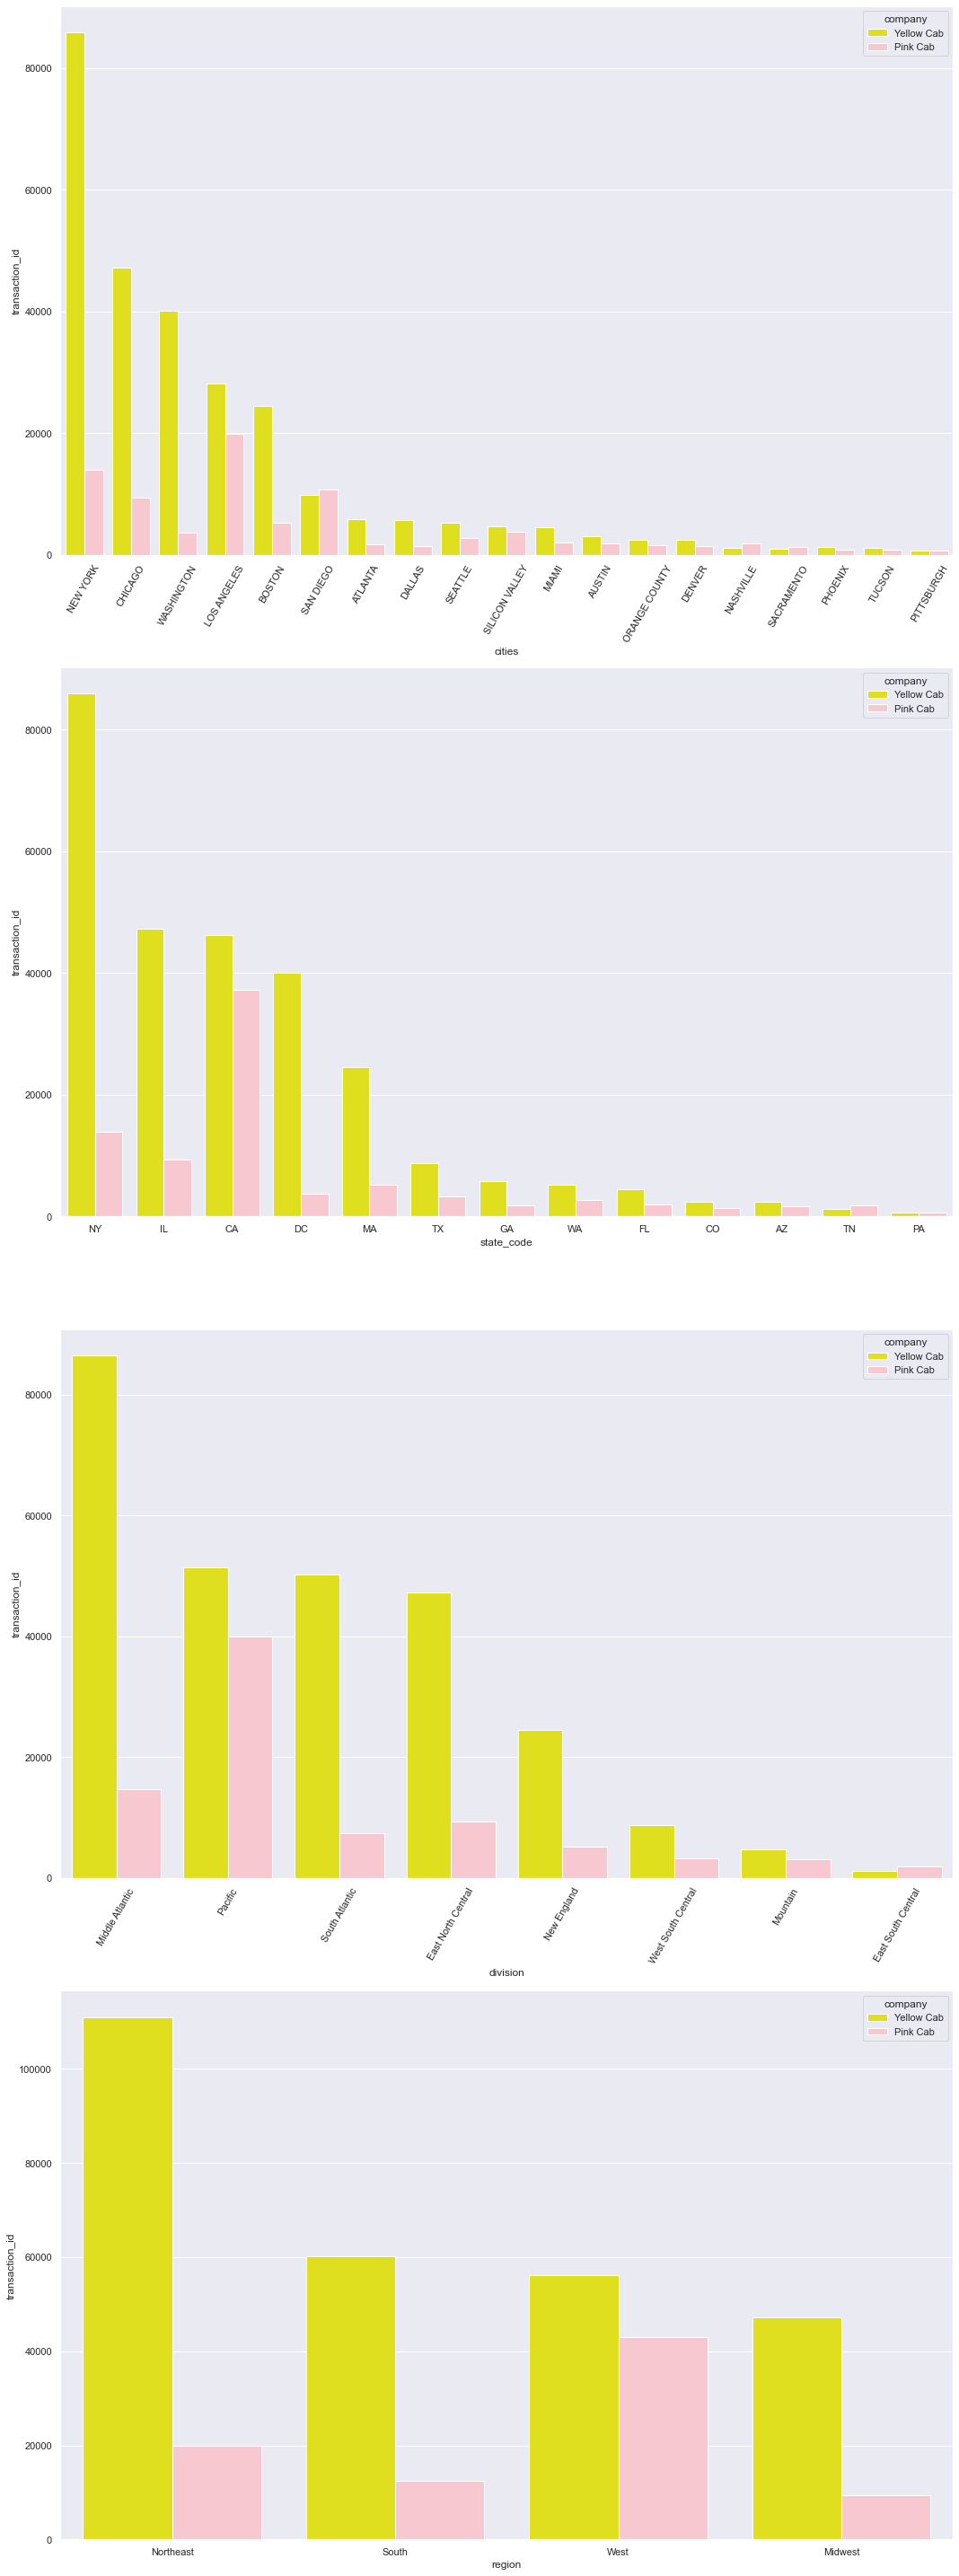

In [60]:
plt.figure(figsize = (15,40))
plt.subplot(4,1,1)
q3_1 = df4[['cities', 'transaction_id', 'company']].groupby(['cities', 'company']).count().reset_index()
sns.barplot(x = 'cities', y = 'transaction_id', hue = 'company', data = q3_1.sort_values('transaction_id', ascending = False), palette = ['yellow', 'pink']);
plt.xticks(rotation=60);

plt.subplot(4,1,2)
q3_2 = df4[['state_code', 'transaction_id', 'company']].groupby(['state_code', 'company']).count().reset_index()
sns.barplot(x = 'state_code', y = 'transaction_id', hue = 'company', data = q3_2.sort_values('transaction_id', ascending = False), palette = ['yellow', 'pink']);

plt.subplot(4,1,3)
q3_3 = df4[['division', 'transaction_id', 'company']].groupby(['division', 'company']).count().reset_index()
sns.barplot(x = 'division', y = 'transaction_id', hue = 'company', data = q3_3.sort_values('transaction_id', ascending = False), palette = ['yellow', 'pink']);
plt.xticks(rotation=60);

plt.subplot(4,1,4)
q3_4 = df4[['region', 'transaction_id', 'company']].groupby(['region', 'company']).count().reset_index()
sns.barplot(x = 'region', y = 'transaction_id', hue = 'company', data = q3_4.sort_values('transaction_id', ascending = False), palette = ['yellow', 'pink']);
plt.tight_layout()

### 4.2.4. Question 4 - In average, which area of US the Cab companies provide higher incomes?

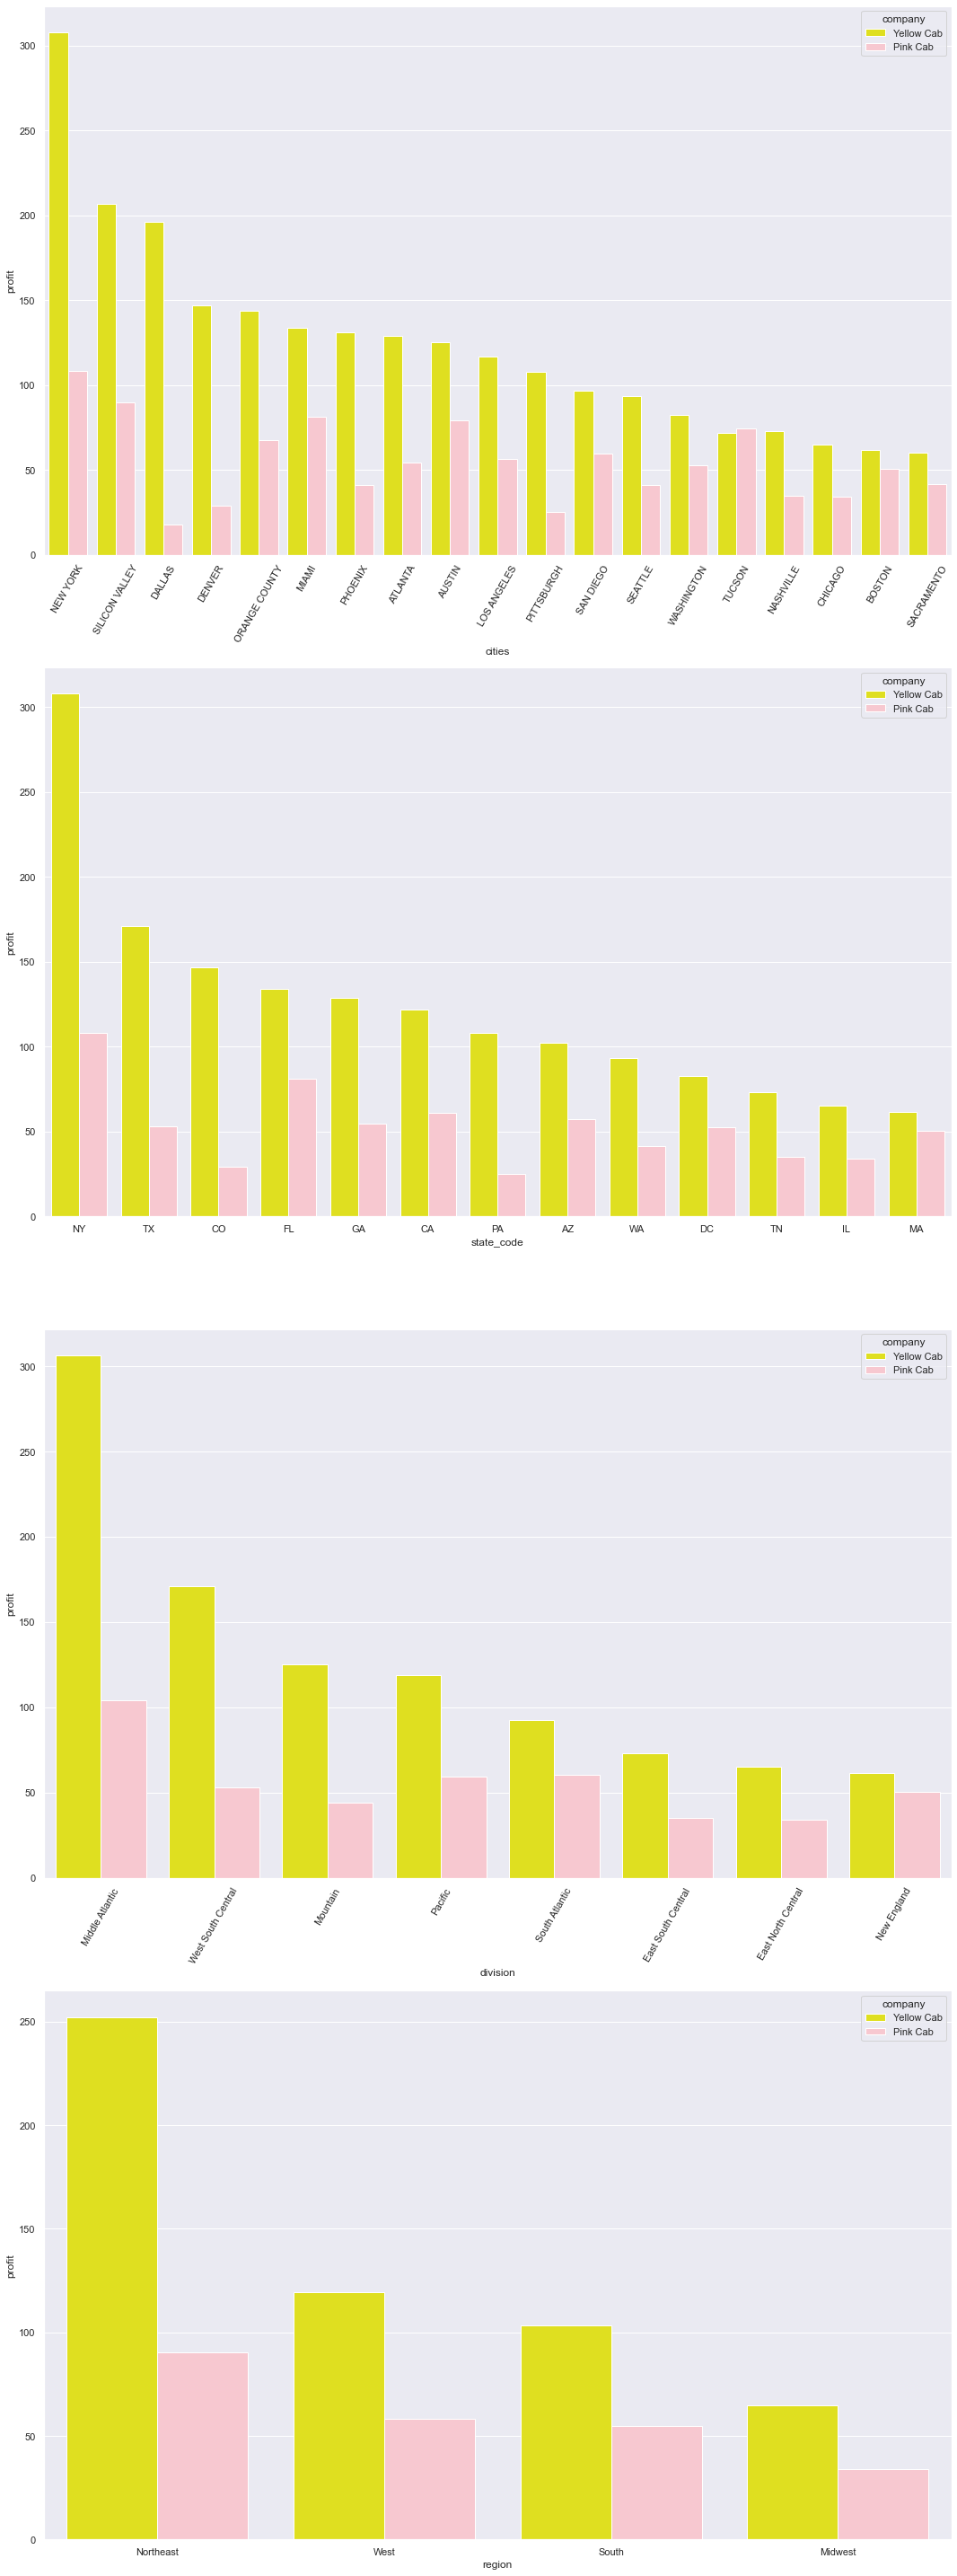

In [36]:
plt.figure(figsize = (15,40))
plt.subplot(4,1,1)
q4_1 = df4[['cities', 'profit', 'company']].groupby(['cities', 'company']).mean().reset_index()
sns.barplot(x = 'cities', y = 'profit', hue = 'company', data = q4_1.sort_values('profit', ascending = False), palette = ['yellow', 'pink']);
plt.xticks(rotation=60);

plt.subplot(4,1,2)
q4_2 = df4[['state_code', 'profit', 'company']].groupby(['state_code', 'company']).mean().reset_index()
sns.barplot(x = 'state_code', y = 'profit', hue = 'company', data = q4_2.sort_values('profit', ascending = False), palette = ['yellow', 'pink']);

plt.subplot(4,1,3)
q4_3 = df4[['division', 'profit', 'company']].groupby(['division', 'company']).mean().reset_index()
sns.barplot(x = 'division', y = 'profit', hue = 'company', data = q4_3.sort_values('profit', ascending = False), palette = ['yellow', 'pink']);
plt.xticks(rotation=60);

plt.subplot(4,1,4)
q4_4 = df4[['region', 'profit', 'company']].groupby(['region', 'company']).mean().reset_index()
sns.barplot(x = 'region', y = 'profit', hue = 'company', data = q4_4.sort_values('profit', ascending = False), palette = ['yellow', 'pink']);
plt.tight_layout()

### 4.2.5. Question 5 - How many travels each company has on each season, in total?

   season company_sum  transaction_id_sum  percentage
0    fall    Pink Cab               31239        8.69
1    fall  Yellow Cab               89172       24.81
2  spring    Pink Cab               13266        3.69
3  spring  Yellow Cab               53515       14.89
4  summer    Pink Cab               20206        5.62
5  summer  Yellow Cab               63506       17.67
6  winter    Pink Cab               20000        5.56
7  winter  Yellow Cab               68488       19.06

On total, the season fall for the company Yellow Cab has the highest percentage of taxi travels among all seasons, with 24.81%.



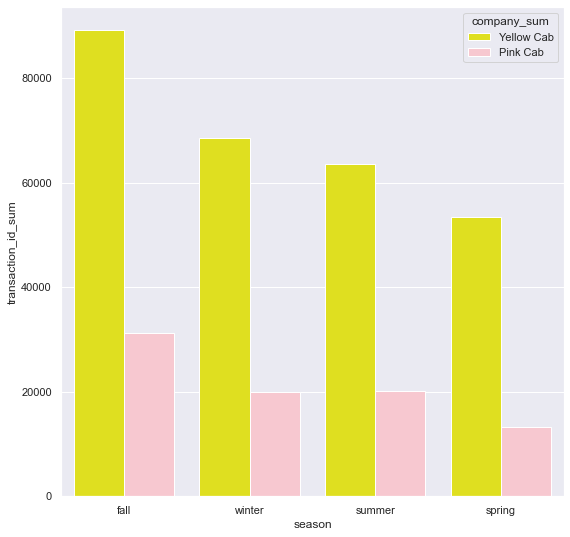

In [61]:
q5 = df4[['season', 'transaction_id', 'company']].groupby(['season', 'company']).count().reset_index()
q5.columns = ['season','company_sum', 'transaction_id_sum']

for i in range(len(q5)):
    q5.loc[i,'percentage'] = round((q5.loc[i, 'transaction_id_sum']) /(sum(q5['transaction_id_sum'])) * 100, 2)

print(q5, end='\n\n')
print('On total, the season {} for the company {} has the highest percentage of taxi travels among all seasons, with {}%.'.format(q5.iloc[1,0], q5.iloc[1,1], q5.iloc[1,3]), end='\n\n')

sns.set(rc={"figure.figsize": (9, 9)})
sns.barplot(x = 'season', y = 'transaction_id_sum', hue = 'company_sum', data = q5.sort_values('transaction_id_sum', ascending = False), palette = ['yellow', 'pink']);

### 4.2.6. Question 6 - Which season the Cab companies provide higher incomes, on average?

   season company_sum  profit_sum  percentage
0    fall    Pink Cab  2001198.57        4.06
1    fall  Yellow Cab 13002215.45       26.36
2  spring    Pink Cab   713528.58        1.45
3  spring  Yellow Cab 10210301.28       20.70
4  summer    Pink Cab   922851.63        1.87
5  summer  Yellow Cab  9298171.03       18.85
6  winter    Pink Cab  1669749.54        3.39
7  winter  Yellow Cab 11509685.41       23.33

On total, the season fall for the company Yellow Cab has the highest amount of profit among all seasons, with $13002215.45 (26.36%).

   season company_average  profit_average
0    fall        Pink Cab           64.06
1    fall      Yellow Cab          145.81
2  spring        Pink Cab           53.79
3  spring      Yellow Cab          190.79
4  summer        Pink Cab           45.67
5  summer      Yellow Cab          146.41
6  winter        Pink Cab           83.49
7  winter      Yellow Cab          168.05

However, on average, the season spring for the company Yellow Cab has th

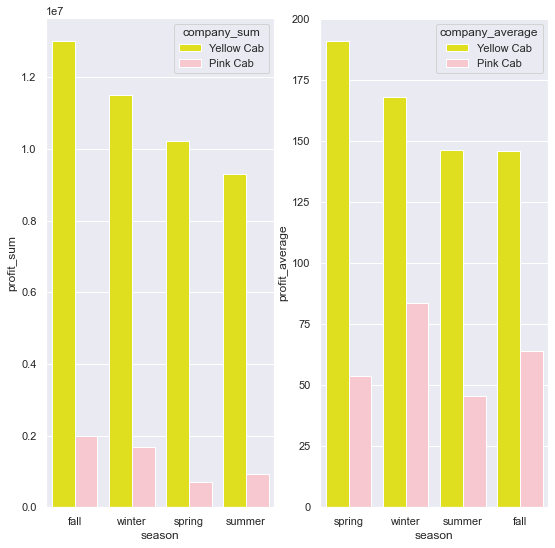

In [62]:
# Total (sum)
q6 = df4[['season', 'profit', 'company']].groupby(['season', 'company']).sum().reset_index()
q6.columns = ['season','company_sum', 'profit_sum']

for i in range(len(q6)):
    q6.loc[i,'percentage'] = (q6.loc[i, 'profit_sum']) /(sum(q6['profit_sum'])) * 100

print(q6, end='\n\n')
print('On total, the season {} for the company {} has the highest amount of profit among all seasons, with ${} ({}%).'.format(q6.iloc[1,0], q6.iloc[1,1], round(q6.iloc[1,2],2), round(q6.iloc[1,3],2)), end='\n\n')

sns.set(rc={"figure.figsize": (9, 9)})
plt.subplot(1,2,1)
sns.barplot(x = 'season', y = 'profit_sum', hue = 'company_sum', data = q6.sort_values('profit_sum', ascending = False), palette = ['yellow', 'pink']);

# Average (mean)
q6_1 = df4[['season', 'profit', 'company']].groupby(['season', 'company']).mean().reset_index()
q6_1.columns = ['season','company_average', 'profit_average']

print(q6_1, end='\n\n')
print('However, on average, the season {} for the company {} has the highest amount of profit among all seasons, with ${}.'.format(q6_1.iloc[3,0], q6_1.iloc[3,1], round(q6_1.iloc[3,2],2)), end='\n\n')

sns.set(rc={"figure.figsize": (9, 9)})
plt.subplot(1,2,2)
sns.barplot(x = 'season', y = 'profit_average', hue = 'company_average', data = q6_1.sort_values('profit_average', ascending = False), palette = ['yellow', 'pink']);

### 4.2.7. Question 7 - How many customers each company has?

  company_sum  customer_id_sum  percentage
0    Pink Cab            14829       32.13
1  Yellow Cab            31319       67.87

In total, the company Yellow Cab has 16490 (35.73%) more customers than the company Pink Cab.



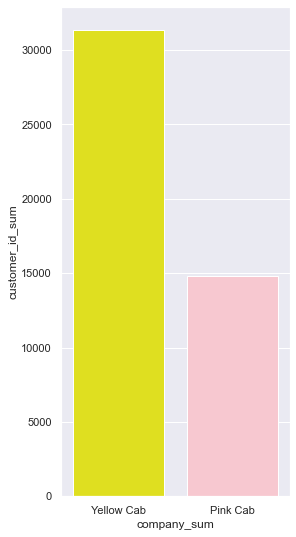

In [63]:
aux = df4.drop_duplicates(subset=['customer_id'])
q7 = aux[['company', 'customer_id']].groupby('company').count().reset_index()
q7.columns = ['company_sum', 'customer_id_sum']

for i in range(len(q2)):
    q7.loc[i,'percentage'] = (q7.loc[i, 'customer_id_sum']) /(sum(q7['customer_id_sum'])) * 100

q7_difference = q7.iloc[1,1] - q7.iloc[0,1]

q7_percentage = round(((q7.loc[1, 'customer_id_sum']) /(sum(q7['customer_id_sum'])) * 100) - ((q7.loc[0, 'customer_id_sum']) /(sum(q7['customer_id_sum'])) * 100), 2)

print(q7, end='\n\n')
print('In total, the company {} has {} ({}%) more customers than the company {}.'.format(q7.iloc[1,0], q7_difference, q7_percentage, q7.iloc[0,0]), end='\n\n')

sns.set(rc={"figure.figsize": (9, 9)})
plt.subplot(1,2,1)
sns.barplot(x = 'company_sum', y = 'customer_id_sum', data = q7.sort_values('customer_id_sum', ascending = False), palette = ['yellow', 'pink']);

### 4.2.7 - Answering the Business Questions

Yellow Cab company has a higher number of taxi trips than Pink Cab company, as well as a higher profit and higher number of customers. 

The data also show that Yellow Cab has superior results in almost all cities, especially in New York, which is the city with the highest profit and higher number of taxi trips.

The same company also stands out from the other company in relation to the season, where the fall or spring (depending which measure is more important) season shows the highest profit and number of taxi trips as well.

Due those all information, it is recommended to invest in Yellow Cab company.

## 4.3. - Hypotesis 

### 4.3.1. - Mind Map Hypotesis 

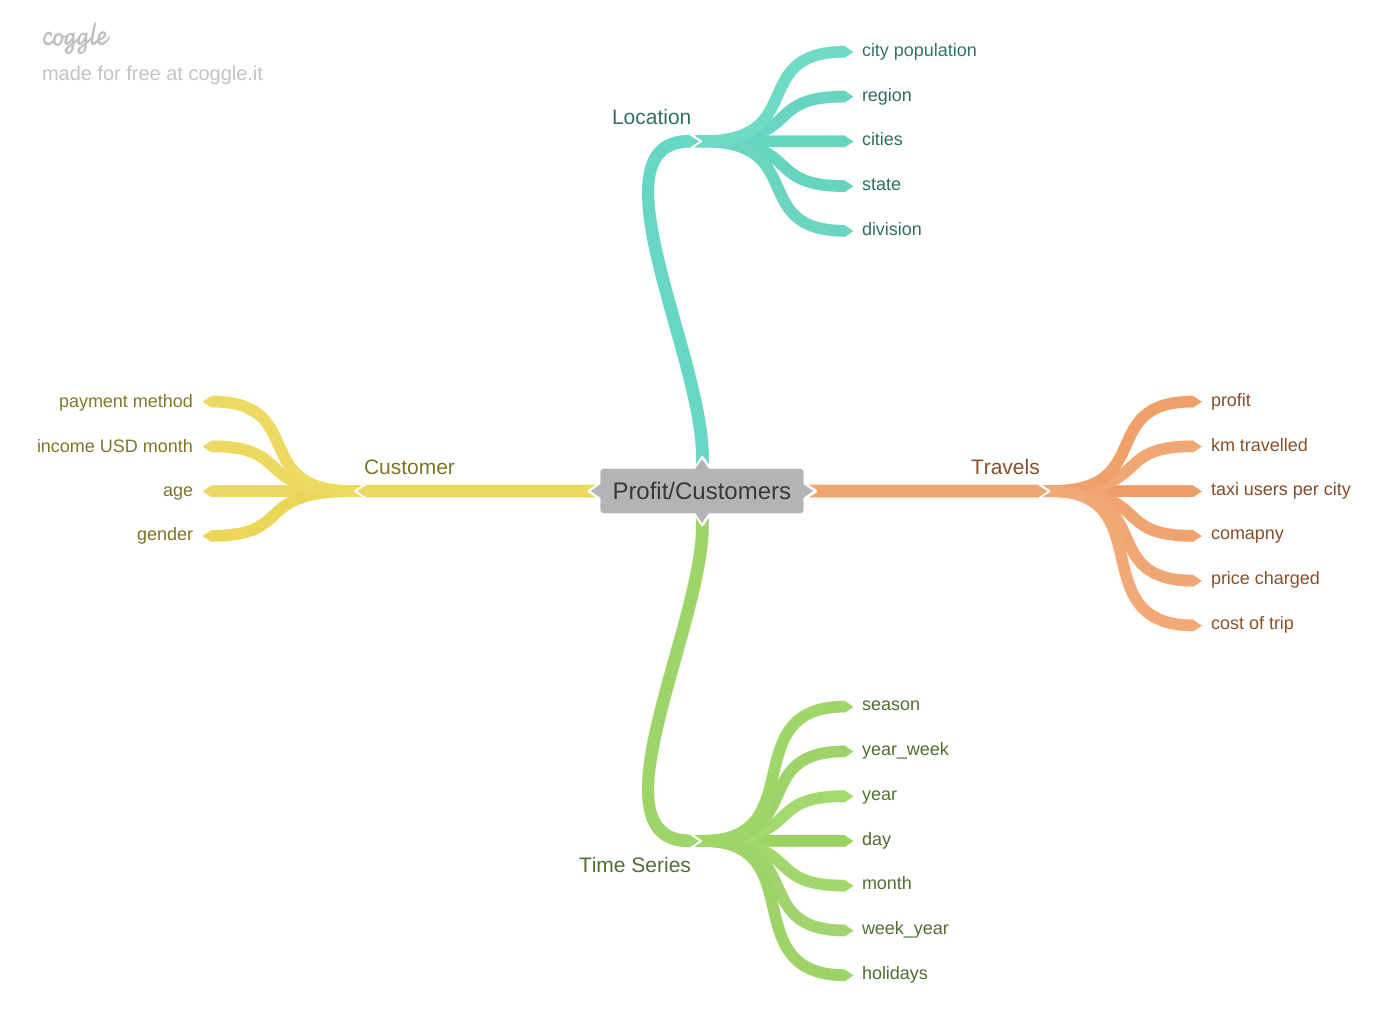

In [40]:
Image('C:/Users/Igor/repos/data_glacier/project_2/G2M_Cab_DataSets/Taxi-Cab-Data-Analysis-and-Insights/img/MindMapHypothesis.png')

### 4.3.2. - Hypotesis Creation 

#### 4.3.2.1 - Travels Hypotesis

**H1.** The number of users of the Yellow Cab plus Pink Cab is the same number of the Total Cab Users at every city.

**FALSE** There are others Cab companies at each state, which the range of customers in others companies floats between 70% and 99%, depending of the state.

In [41]:
H1 = df_city_raw.copy()

H1['City'] = H1['City'].apply(lambda x: 'SILICON VALLEY CA' if x == 'SILICON VALLEY' else 
                                                          'ORANGE COUNTY CA' if x == 'ORANGE COUNTY'   else x)


# spilt city in two columns
new = H1['City'].str.rsplit(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
H1["cities"]= new[0]
  
# making separate last name column from new data frame
H1["State Code"]= new[1]


# Dropping old Name columns
H1.drop(columns =["State Code"], inplace = True)
H1.drop(columns =["City"], inplace = True)
H1.drop(columns =['Population'], inplace = True)
H1.drop(H1[H1['cities'] == 'SAN FRANCISCO'].index,inplace=True)


# droping duplicates on customer id and grouping it by cities
aux1 = df4.drop_duplicates(subset=['customer_id'])
aux2 = aux1[['cities', 'customer_id']].groupby(['cities']).count().reset_index()


# merge df_city_raw with dataset z
H1 = pd.merge(H1, aux2, how='left', on='cities')

#treating dataset
H1['Users'] = H1['Users'].replace(',','', regex=True)
H1['Users'] = H1['Users'].astype(np.float64)


#creating new variable
H1['others_cab_co'] = (H1['Users'] - H1['customer_id']).apply(lambda x : x)

# renaming variables
H1.columns = ['total_of_users', 'cities', 'pink_&_yellow_customers', 'customers_at_others_co']

#creating percentage customer_id variable
for i in range(len(H1)):
    H1.loc[i,'pink_&_yellow_customers_percent'] = ((H1.loc[i, 'pink_&_yellow_customers']) /(H1.loc[i, 'total_of_users'])) * 100
    
#creating percentage others_cab_co variable
for i in range(len(H1)):
    H1.loc[i,'customers_at_others_co_percent'] = ((H1.loc[i, 'customers_at_others_co']) /(H1.loc[i, 'total_of_users'])) * 100   

H1.sort_values('pink_&_yellow_customers_percent', ascending = False)

,total_of_users,cities,pink_&_yellow_customers,customers_at_others_co,pink_&_yellow_customers_percent,customers_at_others_co_percent
15,3643.00,PITTSBURGH,1068,2575.00,29.32,70.68
7,6133.00,PHOENIX,1515,4618.00,24.70,75.30
13,5712.00,TUCSON,1411,4301.00,24.70,75.30
14,7044.00,SACRAMENTO,1633,5411.00,23.18,76.82
17,9270.00,NASHVILLE,1869,7401.00,20.16,79.84
10,12421.00,DENVER,2171,10250.00,17.48,82.52
5,12994.00,ORANGE COUNTY,2216,10778.00,17.05,82.95
11,14978.00,AUSTIN,2419,12559.00,16.15,83.85
3,17675.00,MIAMI,2680,14995.00,15.16,84.84
8,22157.00,DALLAS,2743,19414.00,12.38,87.62


**H2.** The number of users of the Yellow Cab is higher than the company Pink Cab in each city.

**FALSE** There are cities where the Pink cab company has more customers than the Yellow cab company, cities such: San Diego, Nashville, Sacramento and Pitsburgh.

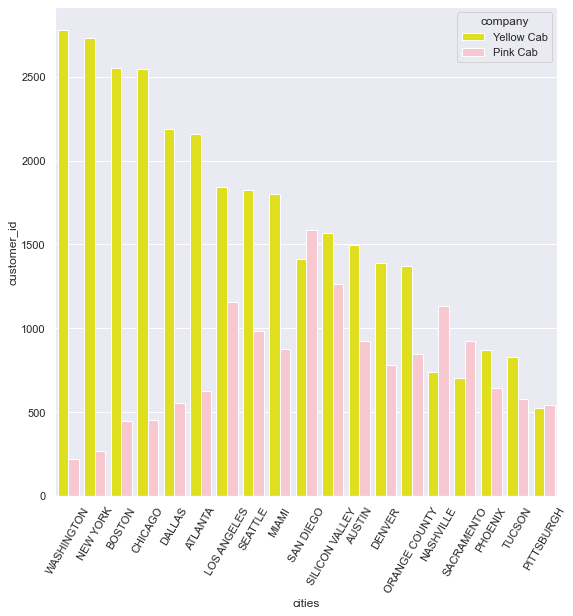

In [64]:
aux3 = df4.drop_duplicates(subset=['customer_id'])
H2 = aux3[['cities', 'customer_id', 'company']].groupby(['cities', 'company']).count().reset_index()

sns.set(rc={"figure.figsize": (9, 9)})
sns.barplot(x = 'cities', y = 'customer_id', hue = 'company', data = H2.sort_values('customer_id', ascending = False), palette = ['yellow', 'pink']);
plt.xticks(rotation=60);

#### 4.3.2.2 - Time Series Hypotesis

**H3.** People uses more taxi during New Year's Day than other holidays in all 3 years.

**FALSE** In total, the holiday which people uses more taxis is Veterans Day, However, splitting this in years, 2016 and 2018, Thanksgiving Day is the holiday which  people uses more taxis, and in 2017 the holiday is Veterans Day.

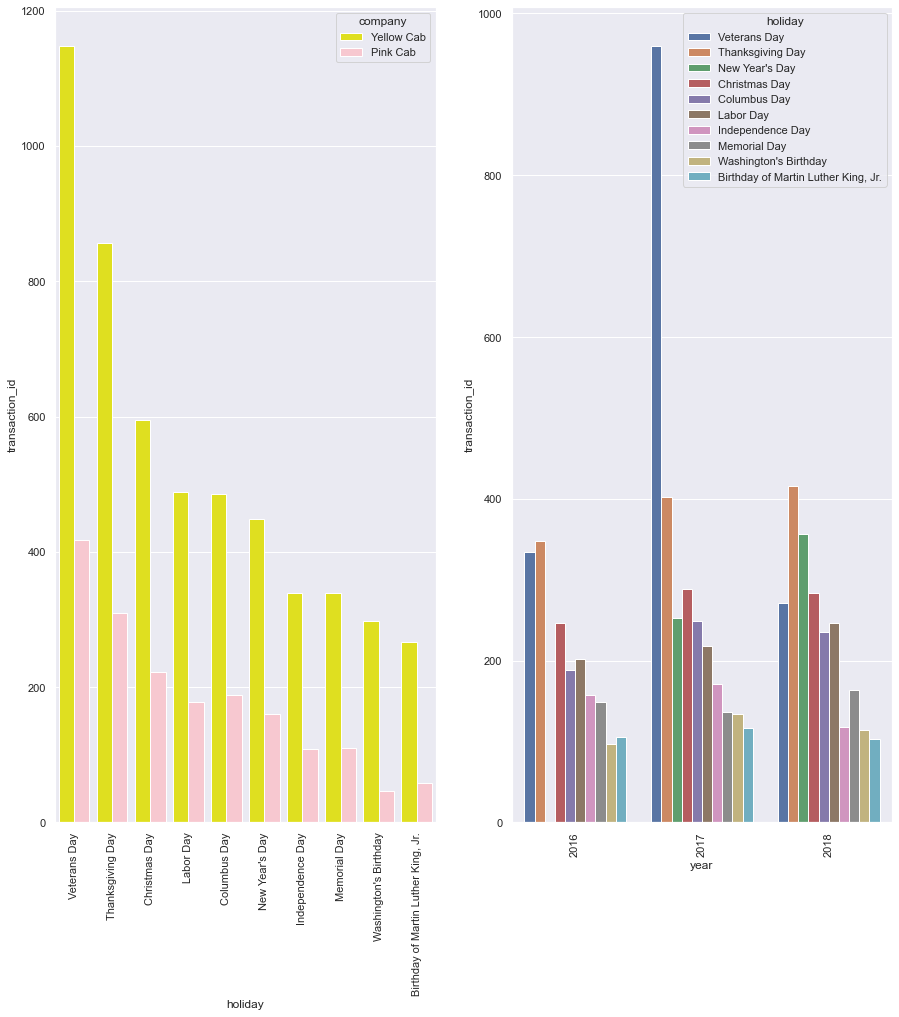

In [70]:
aux = df4[df4['holiday'] != 'Regular day']

sns.set(rc={"figure.figsize": (15, 15)})
plt.subplot(1,2,1)
H3_1 = aux[['holiday', 'transaction_id', 'company']].groupby(['holiday', 'company']).count().reset_index()
sns.barplot(x = 'holiday', y = 'transaction_id', hue = 'company', data = H3_1.sort_values('transaction_id', ascending = False), palette = ['yellow', 'pink']);
plt.xticks(rotation=90);

plt.subplot(1,2,2)
H3_2 = aux[['year', 'holiday', 'transaction_id']].groupby(['year', 'holiday']).count().reset_index()
sns.barplot(x = 'year', y = 'transaction_id', hue = 'holiday', data = H3_2.sort_values('transaction_id', ascending = False));
plt.xticks(rotation=90);

**H4.** The number of users for each company increases WoW (Week over Week).

**FALSE** The number of users for the company Yellow Cab company WoW (Week over Week) suffered a decrease of 2.26 percent.
          The number of users for the company Pink Cab company WoW (Week over Week) suffered a decrease of 2.39 percent.

    year_week     company  customer_id  WoW_percentage
0     2016-00    Pink Cab           91             NaN
1     2016-00  Yellow Cab          259          184.62
2     2016-01    Pink Cab          197          -23.94
3     2016-01  Yellow Cab          744          277.66
4     2016-02    Pink Cab          201          -72.98
..        ...         ...          ...             ...
313   2018-51  Yellow Cab           83           56.60
314   2018-52    Pink Cab           32          -61.45
315   2018-52  Yellow Cab           77          140.62
316   2018-53    Pink Cab            2          -97.40
317   2018-53  Yellow Cab            7          250.00

[318 rows x 4 columns]

The number of users for the company Yellow Cab company WoW (Week over Week) suffered a decrease of -2.26 percent.

The number of users for the company Pink Cab company WoW (Week over Week) suffered a decrease of -2.39 percent.



<AxesSubplot:xlabel='year_week'>

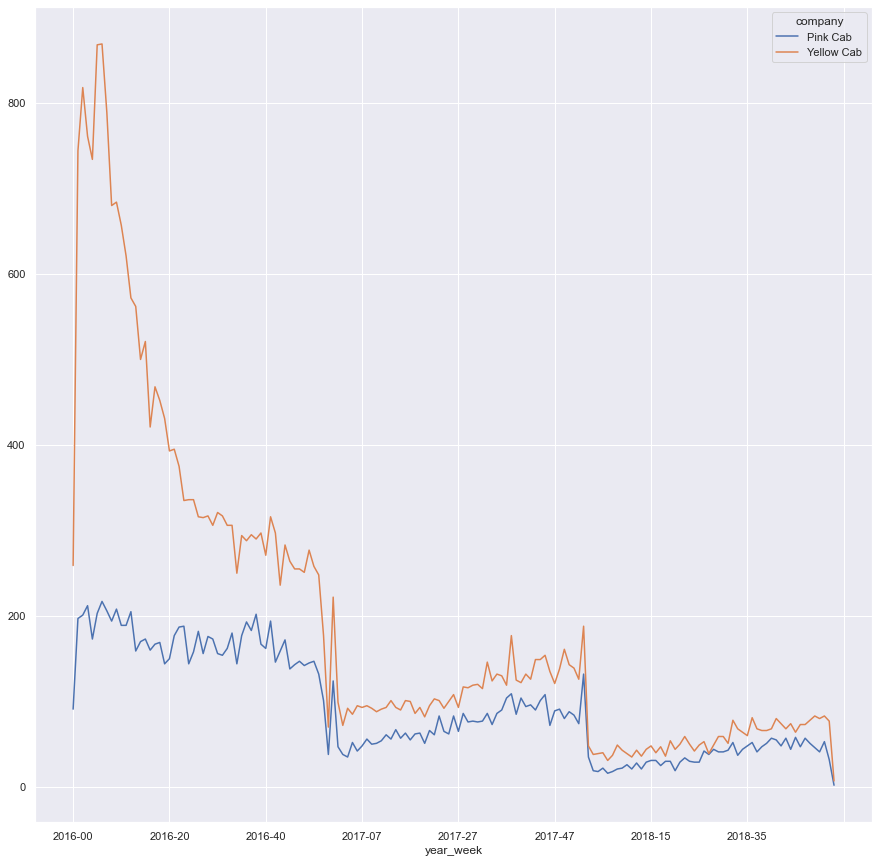

In [71]:
aux = df4.drop_duplicates(subset=['customer_id'])

H4 = aux[['customer_id','year_week', 'company']].groupby(['year_week', 'company']).count().reset_index()

# taxa de crescimento mensal simple, mes por mes
#(esse mes - mes passado) / mes passado
H4['WoW_percentage'] = ((H4['customer_id'] - H4['customer_id'].shift(1)) / H4['customer_id'].shift(1)) * 100

# taxa de crescimento mensal composta, o ultimo mes pelo primeiro mes contando todos os meses do meio
# (last/first)**(1/periods)-1
cmgr_1 = H4[H4['company'] == 'Yellow Cab'].reset_index()
cmgr_yellow = round((((cmgr_1.loc[158, 'customer_id']) / (cmgr_1.loc[0, 'customer_id'])) ** (1 / (cmgr_1['customer_id'].count() - 1)) - 1) * 100, 2)

cmgr_2 = H4[H4['company'] == 'Pink Cab'].reset_index()
cmgr_pink = round((((cmgr_2.loc[158, 'customer_id']) / (cmgr_2.loc[0, 'customer_id'])) ** (1 / (cmgr_2['customer_id'].count() - 1)) - 1) * 100, 2)

print(H4, end = '\n\n')
print('The number of users for the company Yellow Cab company WoW (Week over Week) suffered a decrease of {} percent.'.format(cmgr_yellow), end = '\n\n')
print('The number of users for the company Pink Cab company WoW (Week over Week) suffered a decrease of {} percent.'.format(cmgr_pink), end = '\n\n')

sns.set(rc={"figure.figsize": (15, 15)})
H4_1 = H4.pivot(index = 'year_week', columns = 'company', values = 'customer_id')
H4_1.plot()

**H5.** The amount of money made by the cab companies increase YoY (Year over Year) and MoM (Month over Month).

**FALSE** The amount of money made by the company Yellow Cab company YoY (Year over Year) suffered a decrease of 1.48 percent.
          And the amount of money made by the company Pink Cab company YoY (Year over Year) suffered a decrease of 4.58 percent.

However, the amount of money made by the company Yellow Cab company MoM (Month over Month) suffered an increase of 1.81 percent.
          And the amount of money made by the company Pink Cab company MoM (Month over Month) suffered an increase of 3.94 percent.

   year     company      profit  WoW_percentage
0  2016    Pink Cab  1713511.22             NaN
1  2016  Yellow Cab 13926995.43          712.78
2  2017    Pink Cab  2033654.91          -85.40
3  2017  Yellow Cab 16575977.97          715.08
4  2018    Pink Cab  1560162.19          -90.59
5  2018  Yellow Cab 13517399.77          766.41

The amount of money made by the company Yellow Cab company YoY (Year over Year)  suffered a decrease of -1.48 percent.

The amount of money made by the company Pink Cab company YoY (Year over Year)  suffered a decrease of -4.58 percent.

   year_month     company     profit  WoW_percentage
0     2016-01    Pink Cab   73952.86             NaN
1     2016-01  Yellow Cab  836308.11         1030.87
2     2016-02    Pink Cab   87475.54          -89.54
3     2016-02  Yellow Cab 1009169.17         1053.66
4     2016-03    Pink Cab   87801.18          -91.30
..        ...         ...        ...             ...
67    2018-10  Yellow Cab 1273756.25          563.44
6

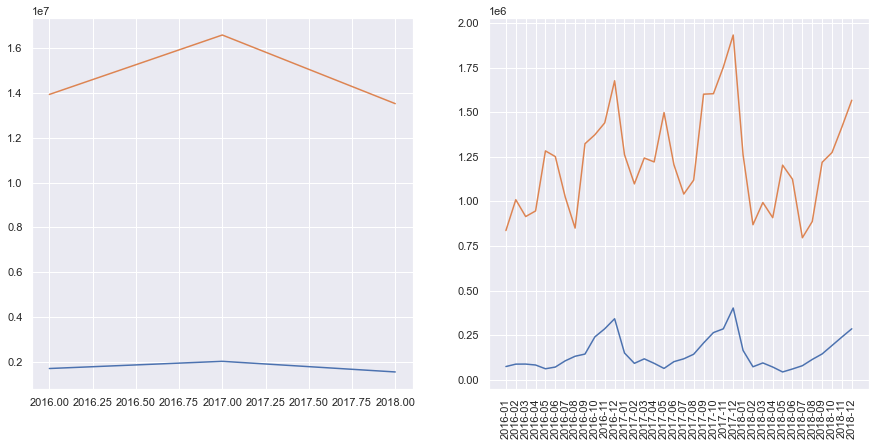

In [45]:
sns.set(rc={"figure.figsize": (10, 10)})

# YoY (Year over Year)
H5_1 = df4[['profit', 'year', 'company']].groupby(['year', 'company']).sum().reset_index()

# taxa de crescimento mensal simple, mes por mes
#(esse mes - mes passado) / mes passado
H5_1['WoW_percentage'] = ((H5_1['profit'] - H5_1['profit'].shift(1)) / H5_1['profit'].shift(1)) * 100

# taxa de crescimento mensal composta, o ultimo mes pelo primeiro mes contando todos os meses do meio
# (last/first)**(1/periods)-1
cmgr_1 = H5_1[H5_1['company'] == 'Yellow Cab'].reset_index()
cmgr_yellow_1 = round((((cmgr_1.loc[2, 'profit']) / (cmgr_1.loc[0, 'profit'])) ** (1 / (cmgr_1['profit'].count() - 1)) - 1) * 100, 2)

cmgr_2 = H5_1[H5_1['company'] == 'Pink Cab'].reset_index()
cmgr_pink_2 = round((((cmgr_2.loc[2, 'profit']) / (cmgr_2.loc[0, 'profit'])) ** (1 / (cmgr_2['profit'].count() - 1)) - 1) * 100, 2)

print(H5_1, end = '\n\n')
print('The amount of money made by the company Yellow Cab company YoY (Year over Year)  suffered a decrease of {} percent.'.format(cmgr_yellow_1), end = '\n\n')
print('The amount of money made by the company Pink Cab company YoY (Year over Year)  suffered a decrease of {} percent.'.format(cmgr_pink_2), end = '\n\n')



# MoM (Month over Month)
H5_2 = df4[['profit','year_month', 'company']].groupby(['year_month', 'company']).sum().reset_index()

# taxa de crescimento mensal simple, mes por mes
#(esse mes - mes passado) / mes passado
H5_2['WoW_percentage'] = ((H5_2['profit'] - H5_2['profit'].shift(1)) / H5_2['profit'].shift(1)) * 100

# taxa de crescimento mensal composta, o ultimo mes pelo primeiro mes contando todos os meses do meio
# (last/first)**(1/periods)-1
cmgr_3 = H5_2[H5_2['company'] == 'Yellow Cab'].reset_index()
cmgr_yellow_3 = round((((cmgr_3.loc[35, 'profit']) / (cmgr_3.loc[0, 'profit'])) ** (1 / (cmgr_3['profit'].count() - 1)) - 1) * 100, 2)

cmgr_4 = H5_2[H5_2['company'] == 'Pink Cab'].reset_index()
cmgr_pink_4 = round((((cmgr_4.loc[35, 'profit']) / (cmgr_4.loc[0, 'profit'])) ** (1 / (cmgr_4['profit'].count() - 1)) - 1) * 100, 2)

print(H5_2, end = '\n\n')
print('The amount of money made by the company Yellow Cab company MoM (Month over Month) suffered an increase of {} percent.'.format(cmgr_yellow_3), end = '\n\n')
print('The amount of money made by the company Pink Cab company MoM (Month over Month) suffered an increase of {} percent.'.format(cmgr_pink_4), end = '\n\n')


fig = plt.figure(figsize=(15,15)) 
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    
ax1 = fig.add_subplot(specs[1, 0]) # Second row, First column
ax2 = fig.add_subplot(specs[1, 1]) # Second row, Second column
    
H5_1_1 = H5_1.pivot(index = 'year', columns = 'company', values = 'profit')
ax1.plot(H5_1_1)

H5_2_1 = H5_2.pivot(index = 'year_month', columns = 'company', values = 'profit')
ax2.plot(H5_2_1)
plt.xticks(rotation=90);

**H6.** The number of travels made by the cab companies increase YoY (Year over Year) and MoM (Month over Month).

**TRUE** The number of travels made by the company Yellow Cab company YoY (Year over Year) suffered a decrease of 7.06 percent.
          And the number of travels made by the company Pink Cab company YoY (Year over Year) suffered a decrease of 8.01 percent.

Also, the number of travels made by the company Yellow Cab company MoM (Month over Month) suffered an increase of 3.35 percent.
          And the number of travels of money made by the company Pink Cab company MoM (Month over Month) suffered an increase of 4.11 percent.

   year     company  transaction_id  WoW_percentage
0  2016    Pink Cab           25080             NaN
1  2016  Yellow Cab           82239          227.91
2  2017    Pink Cab           30321          -63.13
3  2017  Yellow Cab           98189          223.83
4  2018    Pink Cab           29310          -70.15
5  2018  Yellow Cab           94253          221.57

The number of travels for the company Yellow Cab company  YoY (Year over Year)  suffered an increase of 7.06 percent

The number of travels for the company Pink Cab company  YoY (Year over Year)  suffered an increase of 8.1 percent

   year_month     company  transaction_id  WoW_percentage
0     2016-01    Pink Cab             927             NaN
1     2016-01  Yellow Cab            3719          301.19
2     2016-02    Pink Cab            1050          -71.77
3     2016-02  Yellow Cab            4674          345.14
4     2016-03    Pink Cab            1231          -73.66
..        ...         ...             ...             

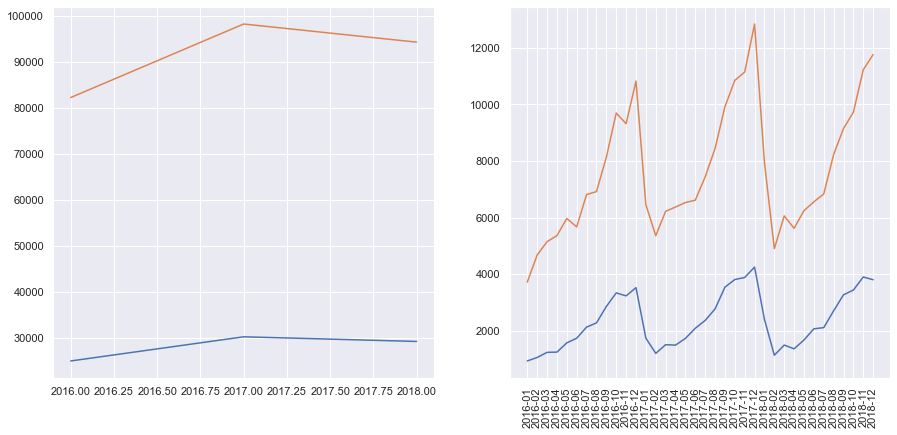

In [46]:
# sns.set(rc={"figure.figsize": (10, 10)})

# YoY (Year over Year)
H6_1 = df4[['transaction_id','year', 'company']].groupby(['year', 'company']).count().reset_index()

# taxa de crescimento mensal simple, mes por mes
#(esse mes - mes passado) / mes passado
H6_1['WoW_percentage'] = ((H6_1['transaction_id'] - H6_1['transaction_id'].shift(1)) / H6_1['transaction_id'].shift(1)) * 100

# taxa de crescimento mensal composta, o ultimo mes pelo primeiro mes contando todos os meses do meio
# (last/first)**(1/periods)-1
cmgr_1 = H6_1[H6_1['company'] == 'Yellow Cab'].reset_index()
cmgr_yellow_1 = round((((cmgr_1.loc[2, 'transaction_id']) / (cmgr_1.loc[0, 'transaction_id'])) ** (1 / (cmgr_1['transaction_id'].count() - 1)) - 1) * 100, 2)

cmgr_2 = H6_1[H6_1['company'] == 'Pink Cab'].reset_index()
cmgr_pink_2 = round((((cmgr_2.loc[2, 'transaction_id']) / (cmgr_2.loc[0, 'transaction_id'])) ** (1 / (cmgr_2['transaction_id'].count() - 1)) - 1) * 100, 2)

print(H6_1, end = '\n\n')
print('The number of travels for the company Yellow Cab company  YoY (Year over Year)  suffered an increase of {} percent'.format(cmgr_yellow_1), end = '\n\n')
print('The number of travels for the company Pink Cab company  YoY (Year over Year)  suffered an increase of {} percent'.format(cmgr_pink_2), end = '\n\n')


# MoM (Month over Month)
H6_2 = df4[['transaction_id','year_month', 'company']].groupby(['year_month', 'company']).count().reset_index()

# taxa de crescimento mensal simple, mes por mes
#(esse mes - mes passado) / mes passado
H6_2['WoW_percentage'] = ((H6_2['transaction_id'] - H6_2['transaction_id'].shift(1)) / H6_2['transaction_id'].shift(1)) * 100

# taxa de crescimento mensal composta, o ultimo mes pelo primeiro mes contando todos os meses do meio
# (last/first)**(1/periods)-1
cmgr_3 = H6_2[H6_2['company'] == 'Yellow Cab'].reset_index()
cmgr_yellow_3 = round((((cmgr_3.loc[35, 'transaction_id']) / (cmgr_3.loc[0, 'transaction_id'])) ** (1 / (cmgr_3['transaction_id'].count() - 1)) - 1) * 100, 2)

cmgr_4 = H6_2[H6_2['company'] == 'Pink Cab'].reset_index()
cmgr_pink_4 = round((((cmgr_4.loc[35, 'transaction_id']) / (cmgr_4.loc[0, 'transaction_id'])) ** (1 / (cmgr_4['transaction_id'].count() - 1)) - 1) * 100, 2)

print(H6_2, end = '\n\n')
print('The number of travels made by the company Yellow Cab company  MoM (Month over Month) suffered an increase of {} percent.'.format(cmgr_yellow_3), end = '\n\n')
print('The number of travels made by the company Pink Cab company  MoM (Month over Month) suffered an increase of {} percent.'.format(cmgr_pink_4), end = '\n\n')

fig = plt.figure(figsize=(15,15)) 
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    
ax1 = fig.add_subplot(specs[1, 0]) # Second row, First column
ax2 = fig.add_subplot(specs[1, 1]) # Second row, Second column

H6_1_1 = H6_1.pivot(index = 'year', columns = 'company', values = 'transaction_id')
ax1.plot(H6_1_1)

H6_2_1 = H6_2.pivot(index = 'year_month', columns = 'company', values = 'transaction_id')
ax2.plot(H6_2_1)
plt.xticks(rotation=90);

**H7.** Companies make more profit during second semester of the year.

**TRUE** In total and in the second semester, the company Yellow Cab make $3770264.7852 (7.64%) more profit than the first semester.

And in the second semester, the company Pink Cab make $2134648.873 (4.33%) more profit than the first semester.

  semester     company      profit  percentage
0    first    Pink Cab  1586339.72        3.22
1    first  Yellow Cab 20125054.19       40.80
2   second    Pink Cab  3720988.60        7.54
3   second  Yellow Cab 23895318.98       48.44

In total and in the second semester, the company Yellow Cab make $3770264.7852 (7.64%) more profit than the first semester.

And in the second semester, the company Pink Cab make $2134648.873 (4.33%) more profit than the first semester.



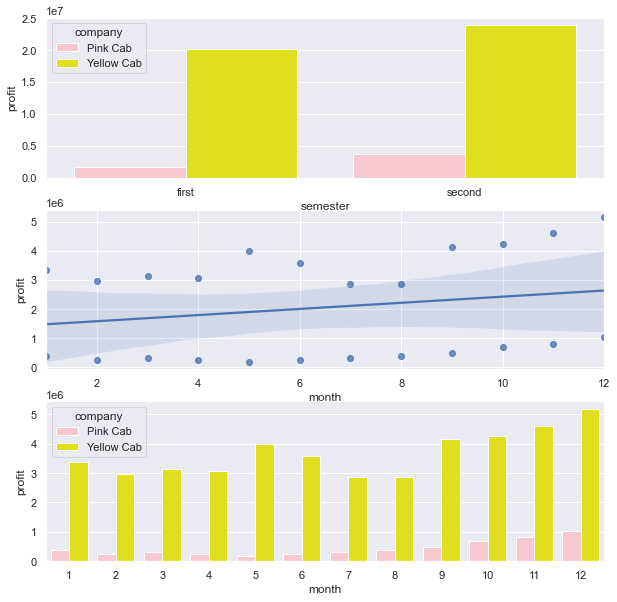

In [47]:
H7 = df4[['month', 'profit', 'company']].groupby(['month', 'company']).sum().reset_index()

H7['semester'] = H7['month'].apply(lambda x: 'first' if x <=6 else
                                                    'second'                )

H7_1 = H7[['semester', 'profit','company']].groupby(['semester', 'company']).sum().reset_index()

for i in range(len(H7_1)):
    H7_1.loc[i,'percentage'] = (H7_1.loc[i, 'profit']) /(sum(H7_1['profit'])) * 100
    
H7_1_difference_yellow = H7_1.loc[3, 'profit'] - H7_1.loc[1,'profit']
H7_1_percentage_yellow = round((H7_1.loc[3, 'percentage']) - (H7_1.loc[1, 'percentage']), 2)

H7_1_difference_pink = H7_1.loc[2,'profit'] - H7_1.loc[0,'profit']
H7_1_percentage_pink = round((H7_1.loc[2, 'percentage']) - (H7_1.loc[0, 'percentage']), 2)

print(H7_1, end='\n\n')
print('In total and in the second semester, the company {} make ${} ({}%) more profit than the first semester.'.format(H7.iloc[3,1], H7_1_difference_yellow , H7_1_percentage_yellow), end='\n\n' )
print('And in the second semester, the company {} make ${} ({}%) more profit than the first semester.'.format(H7.iloc[2,1], H7_1_difference_pink , H7_1_percentage_pink), end='\n\n' )


plt.subplot(3,1,1)
sns.barplot(x = 'semester', y = 'profit', hue = 'company', data = H7_1, palette = ['pink', 'yellow']);


plt.subplot(3,1,2)
sns.regplot(x = 'month', y = 'profit', data = H7);

plt.subplot(3,1,3)
sns.barplot(x = 'month', y = 'profit', hue = 'company', data = H7, palette = ['pink', 'yellow']);

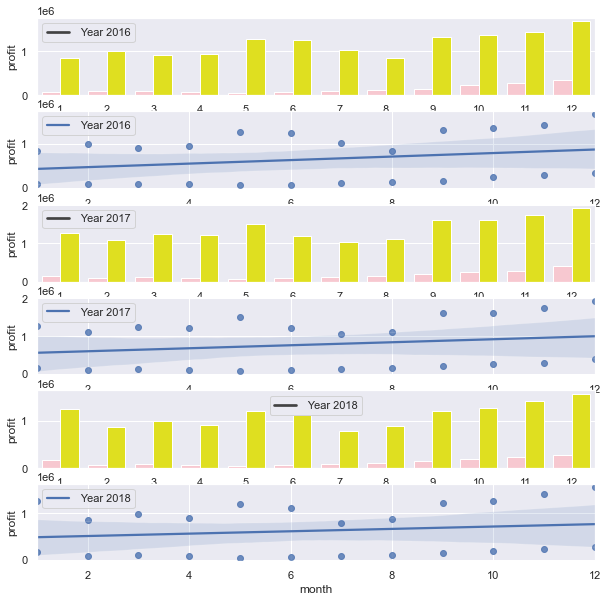

In [48]:
H7_1 = df4[df4['year'] == 2016]
H7_2 = df4[df4['year'] == 2017]
H7_3 = df4[df4['year'] == 2018]


H7_1 = H7_1[['month', 'profit', 'company']].groupby(['month', 'company']).sum().reset_index()

plt.subplot(6,1,1)
ax1 = sns.barplot(x = 'month', y = 'profit', hue = 'company', data = H7_1, palette = ['pink', 'yellow']);
ax1.legend(labels =[' Year 2016'])

plt.subplot(6,1,2)
ax2 = sns.regplot(x = 'month', y = 'profit', data = H7_1);
ax2.legend(labels =[' Year 2016'])

H7_2 = H7_2[['month', 'profit', 'company']].groupby(['month', 'company']).sum().reset_index()

plt.subplot(6,1,3)
ax3 = sns.barplot(x = 'month', y = 'profit', hue = 'company', data = H7_2, palette = ['pink', 'yellow']);
ax3.legend(labels =[' Year 2017'])

plt.subplot(6,1,4)
ax4 = sns.regplot(x = 'month', y = 'profit', data = H7_2);
ax4.legend(labels =[' Year 2017'])

H7_3 = H7_3[['month', 'profit', 'company']].groupby(['month', 'company']).sum().reset_index()

plt.subplot(6,1,5)
ax5 = sns.barplot(x = 'month', y = 'profit', hue = 'company', data = H7_3, palette = ['pink', 'yellow']);
ax5.legend(labels =[' Year 2018'])

plt.subplot(6,1,6)
ax6 = sns.regplot(x = 'month', y = 'profit', data = H7_3);
ax6.legend(labels =[' Year 2018'])

#### 4.3.2.3 - Customers Series Hypotesis

**H8.** People with the amount of income higher than the median uses more taxis.

**FALSE** People with the amount of income higher than the median uses less taxi than people which has income inferior than median, however this difference is minimal, which is 1 for Pink Cab company and 3 for Yellow Cab company.

  income_is_higher_than_median     company  customer_id
0                           no    Pink Cab         7415
1                           no  Yellow Cab        15661
2                          yes    Pink Cab         7414
3                          yes  Yellow Cab        15658
For the company Pink Cab, the number of customer which income is inferior than median is 1 more than customers which income is inferior than median.
For the company Yellow Cab, the number of customers which income is inferior than median is 3 more than customers which income is inferior than median.


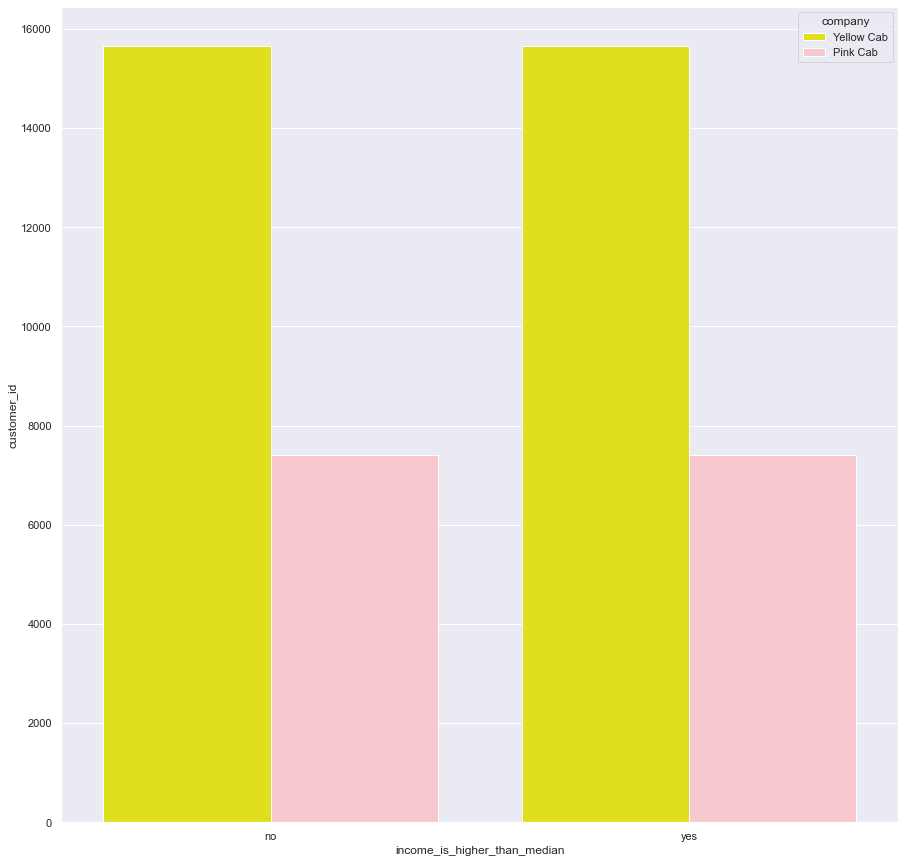

In [72]:
aux = df4.drop_duplicates(subset=['customer_id'])
income_USD_median =aux[['income_USD_month', 'company']].groupby('company').median().reset_index()
income_USD_median.columns = ['company', 'income_median']

H8 = pd.merge(aux,income_USD_median,on='company',how='inner')
        
H8['income_is_higher_than_median'] = H8.apply(lambda x: 'yes' if (x['income_USD_month'] > x['income_median']) else
                                                   'no', axis = 1)

H8_1 = H8[['customer_id', 'income_is_higher_than_median', 'company']].groupby(['income_is_higher_than_median', 'company']).count().reset_index()
H8_1

H8_1_1_difference = H8_1.iloc[1,2] - H8_1.iloc[3,2]
H8_1_2_difference = H8_1.iloc[0,2] - H8_1.iloc[2,2]

print(H8_1)
print('For the company Pink Cab, the number of customer which income is inferior than median is {} more than customers which income is inferior than median.'.format(H8_1_2_difference))
print('For the company Yellow Cab, the number of customers which income is inferior than median is {} more than customers which income is inferior than median.'.format(H8_1_1_difference))
sns.barplot(x = 'income_is_higher_than_median', y = 'customer_id', hue = 'company', data = H8_1.sort_values('customer_id', ascending = False), palette = ['yellow', 'pink']);

**H9.** Men use more cash than women for payment.

**TRUE** In total, the number of men using cash is 20978 (5.84%) more than women.

  payment_mode  gender  transaction_id  percentage
0         Card  Female           92025       25.61
1         Card    Male          123479       34.36
2         Cash  Female           61455       17.10
3         Cash    Male           82433       22.94

In total, the number of men using cash is 20978 (5.84%) more than women.



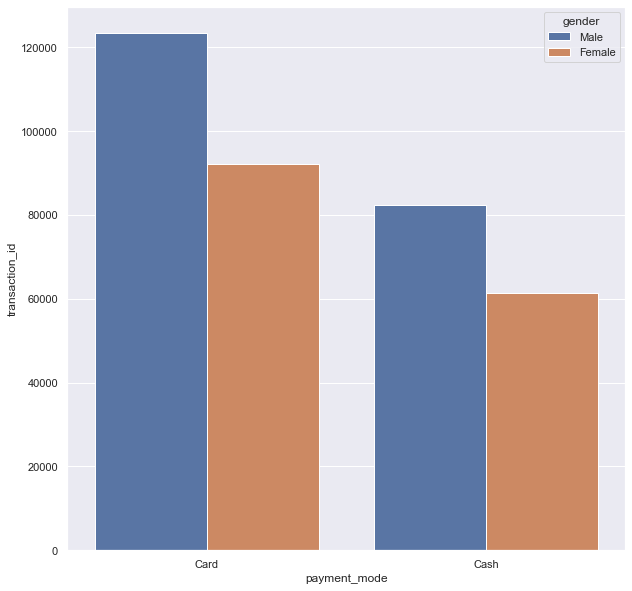

In [50]:
H9 = df4[['transaction_id', 'gender', 'payment_mode']].groupby(['payment_mode', 'gender']).count().reset_index()

for i in range(len(H9)):
    H9.loc[i,'percentage'] = (H9.loc[i, 'transaction_id']) /(sum(H9['transaction_id'])) * 100
    
H9_difference = H9.loc[3, 'transaction_id'] - H9.loc[2,'transaction_id']
H9_percentage= round((H9.loc[3, 'percentage']) - (H9.loc[2, 'percentage']), 2)


print(H9, end='\n\n')
print('In total, the number of men using cash is {} ({}%) more than women.'.format(H9_difference, H9_percentage), end='\n\n' )

sns.barplot(x = 'payment_mode', y = 'transaction_id', hue = 'gender', data = H9.sort_values('transaction_id', ascending = False));

**H10.** Young people use more taxis than old people.

**TRUE.** In total, there are 166884 (46.44%) young people more using taxi than old people.

  age_rate  transaction_id  percentage
0      old           96254       26.78
1    young          263138       73.22

In total, there are 166884 (46.44%) young people more using taxi than old people.



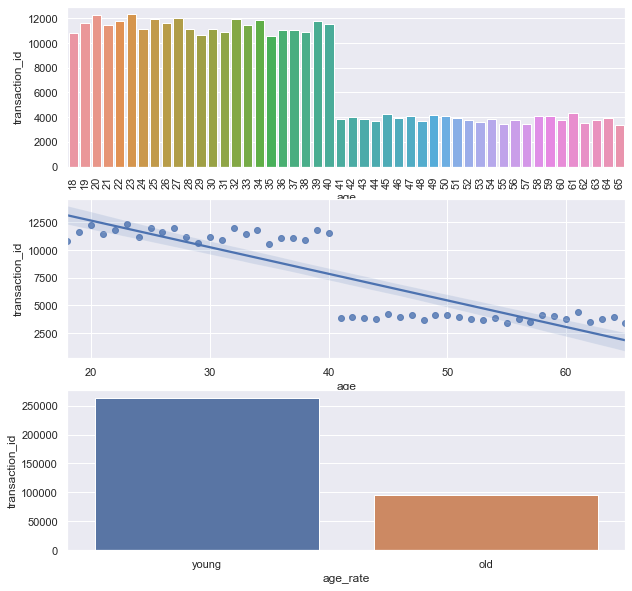

In [51]:
H10 = df4[['age', 'transaction_id']].groupby('age').count().reset_index()

H10['age_rate'] = H10['age'].apply(lambda x: 'young' if x <=40 else
                                                    'old'                )

H10_1 = H10[['age_rate', 'transaction_id']].groupby('age_rate').sum().reset_index()

for i in range(len(H10_1)):
    H10_1.loc[i,'percentage'] = (H10_1.loc[i, 'transaction_id']) /(sum(H10_1['transaction_id'])) * 100


H10_1_difference = H10_1.loc[1,'transaction_id'] - H10_1.loc[0,'transaction_id']

H10_1_percentage = round((H10_1.loc[1, 'percentage']) - (H10_1.loc[0, 'percentage']), 2)

print(H10_1, end='\n\n')
print('In total, there are {} ({}%) young people more using taxi than old people.'.format(H10_1_difference, H10_1_percentage), end='\n\n' )


plt.subplot(3,1,1)
sns.barplot(x = 'age', y = 'transaction_id', data = H10);
plt.xticks(rotation=90);

plt.subplot(3,1,2)
sns.regplot(x = 'age', y = 'transaction_id', data = H10);

plt.subplot(3,1,3)
sns.barplot(x = 'age_rate', y = 'transaction_id', data = H10_1.sort_values('transaction_id', ascending = False));

In [52]:
df4

,transaction_id,date,company,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,...,month,day,year_month,year_week,month_day,season,cities,state_code,region,division
0,10000011,2016-01-08,Pink Cab,30.45,370.95,313.63,29290,Card,Male,28,...,1,8,2016-01,2016-01,01-08,winter,ATLANTA,GA,South,South Atlantic
1,10000012,2016-01-06,Pink Cab,28.62,358.52,334.85,27703,Card,Male,27,...,1,6,2016-01,2016-01,01-06,winter,ATLANTA,GA,South,South Atlantic
2,10000013,2016-01-02,Pink Cab,9.04,125.20,97.63,28712,Cash,Male,53,...,1,2,2016-01,2016-00,01-02,winter,ATLANTA,GA,South,South Atlantic
3,10000014,2016-01-07,Pink Cab,33.17,377.40,351.60,28020,Cash,Male,23,...,1,7,2016-01,2016-01,01-07,winter,ATLANTA,GA,South,South Atlantic
4,10000015,2016-01-03,Pink Cab,8.73,114.62,97.78,27182,Card,Male,33,...,1,3,2016-01,2016-00,01-03,winter,ATLANTA,GA,South,South Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,4.80,69.24,63.36,52392,Cash,Male,24,...,1,8,2018-01,2018-02,01-08,winter,WASHINGTON,DC,South,South Atlantic
359388,10440104,2018-01-04,Yellow Cab,8.40,113.75,106.85,53286,Cash,Male,32,...,1,4,2018-01,2018-01,01-04,winter,WASHINGTON,DC,South,South Atlantic
359389,10440105,2018-01-05,Yellow Cab,27.75,437.07,349.65,52265,Cash,Male,56,...,1,5,2018-01,2018-01,01-05,winter,WASHINGTON,DC,South,South Atlantic
359390,10440106,2018-01-05,Yellow Cab,8.80,146.19,114.05,52175,Card,Male,32,...,1,5,2018-01,2018-01,01-05,winter,WASHINGTON,DC,South,South Atlantic
